#**Пет-проект: анализ рынка инвестиций в индийские стартапы** (2015 - 2019)

Этот пет-проект посвящен анализу рынка инвестиций в индийские стартапы. База данных взята с известного датасет-хранилища *Kaggle*. Данные представлены за 2015 - 2019 год.

Ссылка на исходный датасет: https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-funding/data

**Основные цели проекта:**



1.   Обработать и почистить датасет для удобства пользования
2.   Провести обзор датасета, на этом этапе предполагается выявить основные тренды инвестирования: каков общий объём и распределение вложенных денег, топовые индустрии для инвестирования, изучить самых крупных инвесторов, выяснить самые успешные в этой сфере города и т. д.
3. Детально разобрать информацию вокруг крупных стартапов, выявить тренды и сделать продвинутую визуализацию
4. С помощью методов машинного обучения предсказать будущие инвестиции
5. Сформулировать обширный вывод о рынке инвестиций в индийские стартапы



### План пет-проекта


**Этап 1. Загрузка и подготовка датасета к использованию**


1.   Загрузка датасета на диск через Kaggle API
2.   Загрузка датасета в среду разработки в виде датафрейма Pandas
3. Подготовка структуры датафрейма и числовых данных
4. Обработка пропусков
5. Обработка нечисловых данных

**Этап 2. EDA**




1.   Просмотр общей информации о датасете
2.   Общее распределение суммы инвестиций
3.   Распределение инвестиций по времени
4. Распределение инвестиций по отрослям
5. Распределение инвестиций по локации
6. Топы инвесторов и стартапов
7. Анализ типов инвестиций

**Этап 3. Детальный анализ**

1. Единороги
2. Геогорафический фактор инвестирования
3. Самые популярные стартапы для инвестирования
4. Распределение средней суммы инвестиций по отраслям

**Этап 4. Предсказание инвестиций**

1.   Создание новых признаков
2.   Корреляция между новыми признаками
3.   Обучение: модель kNN
4.   Обучение: модель XGBoost
5.   Обучение: битва моделей
6.   Доработанный подбор гиперпараметров для Random Forest
7.   Визуализация результатов
8.   Вывод


**Этап 5. Заключение**

**----------------------------------------------------------------------------------------------------------------------------------**



### **Этап 1. Загрузка и подготовка датасета к использованию**

**Шаг 1. Загрузка датасета на диск через Kaggle API**

Загружаем датасет через Kaggle API, заранее подготовив файл kaggle.json для использования API

In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle #Переносим токен в нужную папку:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Даём нужные права
!kaggle datasets download -d sudalairajkumar/indian-startup-funding
!unzip indian-startup-funding.zip  # Распаковка (если архив)

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-funding
License(s): CC0-1.0
  0% 0.00/120k [00:00<?, ?B/s]
100% 120k/120k [00:00<00:00, 339MB/s]
Archive:  indian-startup-funding.zip
  inflating: startup_funding.csv     


**Шаг 2. Загрузка датасета в среду разработки в виде датафрейма Pandas**

Загружаем его в переменную 'df', посмотрим как он выглядит


In [2]:
import pandas as pd

df = pd.read_csv('startup_funding.csv')  # Или другой формат (JSON, Excel)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


**Шаг 3. Подготовка структуры датафрейма и формата данных**

Выявим основные потребности на этого этапа (помимо загрузки датасета): проанализируем содержание столбцов, их названия, в каком виде записаны значения, сколько пропусков и какие они: NaN или "unknown", а затем пофиксим это.

1.   Из верхнего шага видно, что столбец Remarks в данном датасете практически незаполнен, поэтому удалим его

2. Удалим все строки в датасете, у которых значение Amount in USD незаполнено, так как этот показатель является ключевым, переименовываем столбец Amount in USD -> Amount. Далее преобразуем данные из строковых в float64, чтобы они стали численными

3. Обработка дат, удаляем все строки без дат, переименовываем меняем столбец Date dd/mm/yyyy -> Date

4. Переименовываем остальные столбцы в угодные названия




In [3]:
k = len(df)

#подшаг 1
df = df.drop('Remarks', axis=1)

#подшаг 2
df = df.dropna(subset=['Amount in USD'])
df = df.rename(columns={'Amount in USD': 'Amount'})
df['Amount'] = df['Amount'].str.replace(',','') #убираем запятые
df = df[df['Amount'].str.isdigit()]
df['Amount'] = df['Amount'].astype('float64')

#подшаг 3
df = df.dropna(subset=['Date dd/mm/yyyy'])
df['Date'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')
df = df.drop('Date dd/mm/yyyy', axis=1)
df = df.dropna(subset=['Date'])


#подшаг 4
df = df.rename(columns={'Sr No': '№'})
df = df.rename(columns={'Industry Vertical': 'Vertical'})
df = df.rename(columns={'City  Location': 'City'})
df = df.rename(columns={'Investors Name': 'Investor'})
df = df.rename(columns={'Startup Name': 'Name'})
df = df.rename(columns={'InvestmentnType': 'InvestmentType'})


print(f'Длина датафрейма изменилась с {k} до {len(df)}')



Длина датафрейма изменилась с 3044 до 2056


**Шаг 4. Обработка пропусков**

Обработам пропуски: числовые были удалены на прошлом шаге, с текстовыми можно поступить следующим образом:

1. Обработка пропусков для категориальных столбцов, заполним пропуски словом "Unknown"

2. Обработка неопознанных названий для категориальных признаков: все приведём к названию unkwon



In [4]:
#подшаг 1
df['Vertical'] = df['Vertical'].fillna('unknown')
df['Investor'] = df['Investor'].fillna('unknown')
df['City'] = df['City'].fillna('unknown')
df['SubVertical'] = df['SubVertical'].fillna('unknown')
df['InvestmentType'] = df['InvestmentType'].fillna('unknown')

#подшаг 2
categorial_columns = ['Investor', 'City', 'Vertical', 'SubVertical', 'InvestmentType']
for col in categorial_columns:
    df[col] = df[col].replace(
        r'(?i)^(undisclosed|unknown|n/a|not available)$',  # (?i) - игнорирует регистр
        'Unknown',
        regex=True
    )

**Шаг 5. Обработка нечисловых данных**

Теперь надо убедиться, что текстовые признаки (категориальные) будут записаны в датасете в пригодном виде. Для этого возьмём список таких столбцов, и пробежимся по их значениям (достаточно просмотреть уникальные)



In [5]:
#print(*df.columns)
print(*categorial_columns)

Investor City Vertical SubVertical InvestmentType


Пройдемся по каждой из них по порядку:


*   Investor - наименование инвестора. В целом, оно может быть абсолютно абстрактным, все пропуски и неназванные инвесторы уже обработаны, идём дальше
*   City - локация стартапа. Городов будет точно конечное количество, а также их названия должны быть написаны правильно и одинаково для одинх и тех же городов (в одном регистре и без ошибок), проверим этот столбец досканально



In [6]:
sorted(df['City'].unique())

['Ahemadabad',
 'Ahmedabad',
 'Amritsar',
 'Andheri',
 'Bangalore',
 'Bangalore / Palo Alto',
 'Bangalore / SFO',
 'Bangalore / San Mateo',
 'Bangalore / USA',
 'Bangalore/ Bangkok',
 'Belgaum',
 'Bengaluru',
 'Bengaluru and Gurugram',
 'Bhopal',
 'Bhubneswar',
 'Boston',
 'Burnsville',
 'California',
 'Chandigarh',
 'Chembur',
 'Chennai',
 'Coimbatore',
 'Dallas / Hyderabad',
 'Delhi',
 'Delhi & Cambridge',
 'Faridabad',
 'Gaya',
 'Goa',
 'Gurgaon',
 'Gurgaon / SFO',
 'Gurugram',
 'Gwalior',
 'Haryana',
 'Hyderabad',
 'Hyderabad/USA',
 'India',
 'India / US',
 'India/Singapore',
 'India/US',
 'Indore',
 'Jaipur',
 'Jodhpur',
 'Kanpur',
 'Karnataka',
 'Kerala',
 'Kolkata',
 'Kormangala',
 'Lucknow',
 'Menlo Park',
 'Missourie',
 'Mumbai',
 'Mumbai / Global',
 'Mumbai / NY',
 'Mumbai / UK',
 'Mumbai/Bengaluru',
 'Nagpur',
 'New Delhi',
 'New Delhi / US',
 'New York',
 'New York, Bengaluru',
 'New York/ India',
 'Noida',
 'Noida / Singapore',
 'Palo Alto',
 'Panaji',
 'Pune',
 'Pune / Du

На лицо сразу несколько проблем, перечислим их и одновремнно решим


1.   Есть ошибки в названиях городов, например Ahemadabad и Ahmedabad - один и тот же город, но написано по разному. Этот и другие примеры обрабатываем в частном порядке
2.   В некоторых строках прописано сразу несколько городов через знак /, а то и стран или районов. Поэтому возьмём для них либо название первого города, либо укажем значение "Unknown", если указана только страна, а районы сопоставим их городу.

Для решения данной задачи я использовал DeepSeek, чтобы он проанализировал каждое уникальное значение по отдельности и помог мне их скорректировать



In [7]:
import re

#словарь для исправления неточностей
corrections = {
    # Грамматические ошибки
    'Ahemadabad': 'Ahmedabad',
    'Bhubneswar': 'Bhubaneswar',
    'Gurgaon': 'Gurugram',

    # Разночтения в названиях
    'Bangalore and Gurugram': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'New Delhi': 'Delhi',

    # Замена районов на города
    'Andheri': 'Mumbai',
    'Chembur': 'Mumbai',
    'Kormangala': 'Bangalore',
    'Taramani': 'Chennai',
    'Palo Alto': 'California',
    'San Jose' : 'California',
    'SFO': 'California',
    'Menlo Park' : 'California'
}

# Функция для обработки каждого значения
def clean_city(city):
  if city == 'Unknown':
    return city
  for wrong, correct in corrections.items():
    city = city.replace(wrong, correct)

  # Обработаем составные значения
  if '/' in city or '&' in city or ',' in city:
    parts = re.split(r'[/,&]| and ', city)
    first_part = parts[0].strip()

  # Проверим, является ли первая часть страной
    if first_part in ['India', 'USA', 'US', 'UK', 'Singapore', 'Global']:
      return 'Unknown'

  # Возвращаем исправленный город, если он в словаре
    return corrections.get(first_part, first_part)

  return corrections.get(city, city)

df['City'] = df['City'].apply(clean_city)
non_cities = ['India', 'Singapore'] #тут страны и неиндийские города

df['City'] = df['City'].apply(lambda x: 'Unknown' if x in non_cities else x)

print("Проверка результата: ")
print(*sorted(df['City'].unique()), sep='\n')

Проверка результата: 
Ahmedabad
Amritsar
Bangalore
Belgaum
Bhopal
Bhubaneswar
Boston
Burnsville
California
Chandigarh
Chennai
Coimbatore
Dallas
Delhi
Faridabad
Gaya
Goa
Gurugram
Gwalior
Haryana
Hyderabad
Indore
Jaipur
Jodhpur
Kanpur
Karnataka
Kerala
Kolkata
Lucknow
Missourie
Mumbai
Nagpur
New York
Noida
Panaji
Pune
Rourkela
San Francisco
Santa Monica
Surat
Trivandrum
Tulangan
Udaipur
Udupi
Unknown
Vadodara
Varanasi


Идём далее по столбцам:


*   Vertical - вертикаль индустрии, надо обязательно просмотреть

In [8]:
print(*sorted(df['Vertical'].unique()), sep='\n')

3D Printer Manufacturer
API Workflow platform
Accounting
Advertising & Marketing Community Networking platform
Advertising, Marketing
Aerospace
Affordable Education
Affordable Hotel Booking Online
Agriculture
Agtech
Alternate Mobile Monetization platform
App Analytics platform
App based Bus Pooling Services
App security\\xc2\\xa0 testing platform
Architectural Design & Consulting
Artificial Intelligence
Artificial Intelligence platform
Asset Financing platform
Auto Insurance Online platform
Auto Rickshaw Based Services
Auto Rickshaw based Logistics
Automated Storage & Warehousing Solution
Automation
Automobile
Automotive
Autorickshaw Aggregator & Booking platform
B2B
B2B Marketing
B2B Merchandize platform
B2B Mobile Auction Marketplace
B2B Platform
B2B eCommerce Marketplace
B2B-focused foodtech startup
B2C Messaging App
Banking Analytics Platform
Beauty & Lifestyle Mobile Marketplace
Beauty & Wellness Products e-tailer
Beauty and Wellness Marketplace
Bespoke Merchandize Marketplace
Big

3. Сгруппируем похожие вертикали в одну для полноты картины

Тут был опять использован DeepSeek для исполнения муторной, но не требуюущей особых знаний, работы

In [9]:
# Создаем словарь для замены и группировки
vertical_mapping = {
    # Стандартизация написания
    r'eCommece': 'eCommerce',
    r'Fiinance': 'Finance',
    r'Ed[-\s]?[Tt]ech': 'EdTech',
    r'Fin[-\s]?[Tt]ech': 'FinTech',
    r'Food[-\s]?[Tt]ech': 'FoodTech',
    r'Health[-\s]?[Tt]ech': 'HealthTech',
    r'Logistics[-\s]?[Tt]ech': 'LogisticsTech',
    r'Clean[-\s]?[Tt]ech': 'CleanTech',
    r'Ag[-\s]?[Tt]ech': 'AgTech',
    r'Deep[-\s]?[Tt]ech': 'DeepTech',
    r'^Consumer internet$': 'Consumer Internet',

    # Группировка схожих категорий с сохранением специализации
    r'.*Grocery.*': 'Grocery Tech',
    r'.*Food.*Delivery.*': 'Food Delivery',
    r'.*Food.*Ordering.*': 'Food Ordering',
    r'.*Furniture.*': 'Furniture & Home Decor',
    r'.*Fashion.*|.*Apparel.*|.*Jewellery.*': 'Fashion & Apparel',
    r'.*Beauty.*|.*Wellness.*': 'Beauty & Wellness',
    r'.*Hotel.*': 'Hotel',
    r'.*Real[-\s]?Estate.*': 'Real Estate Tech',
    r'.*Hyper[-\s]?local.*': 'Hyperlocal Services',
    r'.*On[-\s]?[Dd]emand.*': 'On-Demand Services',
    r'.*Logistics.*': 'Logistics & Supply Chain',
    r'.*Transport.*|.*Cab.*|.*Ride.*': 'Transport',
    r'.*Analytics.*|.*Big\s?Data.*': 'Data Analytics',
    r'.*SaaS.*|.*Cloud.*': 'Cloud & SaaS',
    r'.*Healthcare.*|.*Medical.*|.*Hospitality.*': 'Healthcare',
    r'.*EdTech.*|.*Education.*': 'EdTech',
    r'.*FinTech.*|.*Finance.*|.*Lending.*': 'FinTech',
    r'.*eCommerce.*|.*E[-\s]?commerce.*': 'eCommerce',

    # Замена без потери специфики
    r'B2B\s?eCommerce': 'B2B eCommerce',
    r'B2B\s?Platform': 'B2B Platforms',
    r'Mobile\s?Wallet': 'Mobile Payments',
    r'Digital\s?/?\s?Mobile\s?Wallet': 'Mobile Payments',
    r'IoT|Internet\s?of\s?Things': 'IoT',
    r'Artificial\s?Intelligence': 'AI & Machine Learning',
    r'Video\s?Games|Gaming': 'Gaming & Esports',

    # Замена "Others"
    r'^Others$': 'Unknown'
}

def clean_vertical(vertical):
    """Функция для очистки и категоризации вертикалей"""
    if pd.isna(vertical) or vertical == 'Unknown':
        return 'Unknown'

    # Удаление экранированных символов
    cleaned = re.sub(r'\\x[0-9a-fA-F]{2}', '', vertical)
    cleaned = re.sub(r'\\[nrt]', ' ', cleaned)
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()

    # Применение маппинга
    for pattern, replacement in vertical_mapping.items():
        if re.search(pattern, cleaned, flags=re.IGNORECASE):
            return replacement

    return cleaned  # Возвращаем оригинал, если нет совпадений

# Применяем функцию к столбцу
df['Vertical'] = df['Vertical'].apply(clean_vertical)

# Проверяем результат
print("Уникальные вертикали после очистки:")
print(df['Vertical'].value_counts().head(20))

Уникальные вертикали после очистки:
Vertical
Consumer Internet           589
Technology                  310
eCommerce                   222
Unknown                     133
FinTech                      80
Healthcare                   59
EdTech                       49
Logistics & Supply Chain     41
Food Delivery                18
Transport                    16
Hyperlocal Services          16
Data Analytics               16
Food & Beverage              15
Fashion & Apparel            15
Hotel                        13
Beauty & Wellness            13
Cloud & SaaS                 13
On-Demand Services           12
Grocery Tech                 11
Real Estate Tech             10
Name: count, dtype: int64


В целом, вертикали индустрии стали более грубо категоризированы, но за счет этого их стало значительно меньше, что даст свой положительный эффект в будущем


*   SubVertical пока оставим как есть
*   InvestmentnType проанализируем



In [10]:
print(*sorted(df['InvestmentType'].unique()), sep='\n')

Angel
Angel / Seed Funding
Angel Round
Corporate Round
Crowd Funding
Crowd funding
Debt Funding
Debt and Preference capital
Debt-Funding
Equity
Equity Based Funding
Funding Round
Inhouse Funding
Maiden Round
Mezzanine
Pre-Series A
Pre-series A
Private
Private Equity
Private Equity Round
Private Funding
PrivateEquity
Private\\nEquity
Seed
Seed / Angel Funding
Seed / Angle Funding
Seed Funding
Seed Funding Round
Seed Round
Seed/ Angel Funding
Seed/Angel Funding
Seed\\nFunding
Series A
Series B
Series B (Extension)
Series C
Series D
Series E
Series F
Series G
Series H
Series J
Single Venture
Structured Debt
Term Loan
Unknown
Venture - Series Unknown
Venture Round
pre-Series A
pre-series A


Опять же, пребегнем к DeepSeek для исправления объединения схожих категорий в одну, нужно: поправить регистр для объединения одинаковых признаков, убрать лишние символы, а также например объединить Series B и Series B (Extension) в Series B, Venture - Series Unknown и Venture Round в Venture, везде где есть слово Angel - просто в Angel и тому подобное

In [11]:
# Создаем словарь для нормализации типов инвестиций
investment_mapping = {
    # Ангельские инвестиции
    r'angel.*': 'Angel',
    r'angle.*': 'Angel',  # Исправляем опечатку "Angle"

    # Посевные раунды
    r'seed.*': 'Seed',
    r'maiden.*': 'Seed',  # Maiden Round = Seed

    # Предсерийные раунды
    r'pre-?series\s?a': 'Pre-Series A',

    # Серийные раунды (A-J) + объединение расширений
    r'series\s?[a-j]\s?\(extension\)': lambda x: re.sub(r'\s?\(extension\)', '', x).upper(),
    r'series\s?[a-j]': lambda x: x.upper(),

    # Венчурные инвестиции
    r'venture\s?-\s?series\s?unknown': 'Venture',
    r'venture\s?round': 'Venture',

    # Частные инвестиции
    r'private\s?equity': 'Private Equity',
    r'private\s?funding': 'Private Funding',
    r'private\s?round': 'Private Funding',
    r'private[^e]': 'Private Funding',  # Private без Equity

    # Краудфандинг
    r'crowd\s?funding': 'Crowdfunding',

    # Долговое финансирование
    r'debt\s?[-]?\s?funding': 'Debt Funding',
    r'debt\s?and\s?preference\s?capital': 'Debt Funding',
    r'structured\s?debt': 'Debt Funding',
    r'term\s?loan': 'Debt Funding',

    # Корпоративные раунды
    r'corporate\s?round': 'Corporate Round',

    # Прочие типы
    r'inhouse\s?funding': 'Inhouse Funding',
    r'mezzanine': 'Mezzanine Financing',
    r'single\s?venture': 'Single Venture',
    r'equity\s?based\s?funding': 'Equity Funding',
    r'funding\s?round': 'Funding Round',

    # Неизвестные
    r'unknown': 'Unknown'
}

def clean_investment_type(inv_type):
    """Функция для очистки и стандартизации типов инвестиций"""
    if pd.isna(inv_type):
        return 'Unknown'

    # Базовая очистка
    cleaned = str(inv_type).strip()
    cleaned = re.sub(r'\\n', ' ', cleaned)  # Удаляем \n
    cleaned = re.sub(r'\s+', ' ', cleaned)  # Удаляем лишние пробелы

    # Приводим к нижнему регистру для регистронезависимого сравнения
    lower_cleaned = cleaned.lower()

    # Применяем маппинг
    for pattern, replacement in investment_mapping.items():
        if re.search(pattern, lower_cleaned):
            if callable(replacement):
                return replacement(cleaned)
            return replacement

    # Возвращаем оригинал с нормализацией регистра
    return cleaned.title()  # Capitalize First Letters

# Применяем функцию к столбцу
df['InvestmentType'] = df['InvestmentType'].apply(clean_investment_type)

# Дополнительная обработка для Seed & Angel
df['InvestmentType'] = df['InvestmentType'].replace({
    'Seed / Angel Funding': 'Seed & Angel',
    'Seed / Angle Funding': 'Seed & Angel',
    'Seed/ Angel Funding': 'Seed & Angel',
    'Seed/Angel Funding': 'Seed & Angel'
})

# Проверяем результат
print("Уникальные типы инвестиций после очистки:")
print(df['InvestmentType'].value_counts())

Уникальные типы инвестиций после очистки:
InvestmentType
Private Equity          1070
Seed                     746
Angel                    112
Debt Funding              28
SERIES A                  22
SERIES B                  19
SERIES C                  14
SERIES D                  12
Pre-Series A               8
Venture                    3
SERIES F                   2
Crowdfunding               2
SERIES E                   2
Private Funding            2
Equity                     2
SERIES G                   1
Single Venture             1
SERIES H                   1
Unknown                    1
SERIES J                   1
Corporate Round            1
Funding Round              1
Inhouse Funding            1
SERIES B (EXTENSION)       1
Mezzanine Financing        1
Equity Funding             1
Private                    1
Name: count, dtype: int64


На этом этап 1 выполнен, однако стоит сказать пару слов о выбросах в данных, которые как правило обрабатываются

Я не стал удалять "выбросы" (значения выше условного и ниже условного квантилей, например уровней 25 и 75 или 1 и 99), так как в данном случае они не являются случайными аномалиями.

**Вывод этапа 1** : данные были не совсем идеальны: все столбцы имели текстовый формат данных (кроме столбца нумерации), были некоторые пропуски в числовых столбцах, было не мало пропусков в текстовых, одинаковые, с точки зрения логики, текстовые значения были записаны в разном регистре/с разными знаками препинания/с ошибками, был даже едва заполненный столбец. Все эти проблемы были успешно решены, и, сами данные при этом не были никак затронуты (не было обработок выбросов, нормализации и прочего).

**Теперь датасет готов к аналитике!**

### **Этап 2. EDA**

На этом этапе мы посмотрим распеределение данных по различным признакам (числовые и категориальные).

**Шаг 1. Просмотр общей информации о датасете**

Начнём с примитивной развездки: выведем head, tail, info, describe

In [12]:
df.head()

,№,Name,Vertical,SubVertical,City,Investor,InvestmentType,Amount,Date
0,1,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,2020-01-09
1,2,Shuttl,Transport,App based shuttle service,Gurugram,Susquehanna Growth Equity,SERIES C,8048394.0,2020-01-13
2,3,Mamaearth,eCommerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,SERIES B,18358860.0,2020-01-09
3,4,https://www.wealthbucket.in/,FinTech,Online Investment,Delhi,Vinod Khatumal,Pre-Series A,3000000.0,2020-01-02
4,5,Fashor,Fashion & Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed,1800000.0,2020-01-02


In [13]:
df.tail()

,№,Name,Vertical,SubVertical,City,Investor,InvestmentType,Amount,Date
3038,3039,Grabhouse.com,Unknown,Unknown,Unknown,"Kalaari Capital, Sequoia Capital",Private Equity,2500000.0,2015-01-28
3039,3040,Printvenue,Unknown,Unknown,Unknown,Asia Pacific Internet Group,Private Equity,4500000.0,2015-01-29
3040,3041,Graphene,Unknown,Unknown,Unknown,KARSEMVEN Fund,Private Equity,825000.0,2015-01-29
3041,3042,Mad Street Den,Unknown,Unknown,Unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,2015-01-30
3043,3044,couponmachine.in,Unknown,Unknown,Unknown,UK based Group of Angel Investors,Seed,140000.0,2015-01-31


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2056 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   №               2056 non-null   int64         
 1   Name            2056 non-null   object        
 2   Vertical        2056 non-null   object        
 3   SubVertical     2056 non-null   object        
 4   City            2056 non-null   object        
 5   Investor        2056 non-null   object        
 6   InvestmentType  2056 non-null   object        
 7   Amount          2056 non-null   float64       
 8   Date            2056 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 160.6+ KB


In [15]:
df.describe()

,№,Amount,Date
count,2056.000000,2.056000e+03,2056
mean,1473.568580,1.849454e+07,2016-10-24 06:13:18.443579648
min,1.000000,1.600000e+04,2015-01-02 00:00:00
25%,622.750000,4.690000e+05,2015-10-26 18:00:00
50%,1440.500000,1.700000e+06,2016-08-24 00:00:00
75%,2307.250000,8.000000e+06,2017-09-05 00:00:00
max,3044.000000,3.900000e+09,2020-01-13 00:00:00
std,925.110915,1.216346e+08,NaN


In [16]:
df.shape

(2056, 9)

**Шаг 2. Общее распределение суммы инвестиций**

Для начала подключим новые библеотеки



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

Зададим стили будущих графиков

In [18]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

Теперь построим

*   Гистограмму-график распределение суммы инвестиций
*   BoxPlot

Text(0, 0.5, 'Количество сделок')

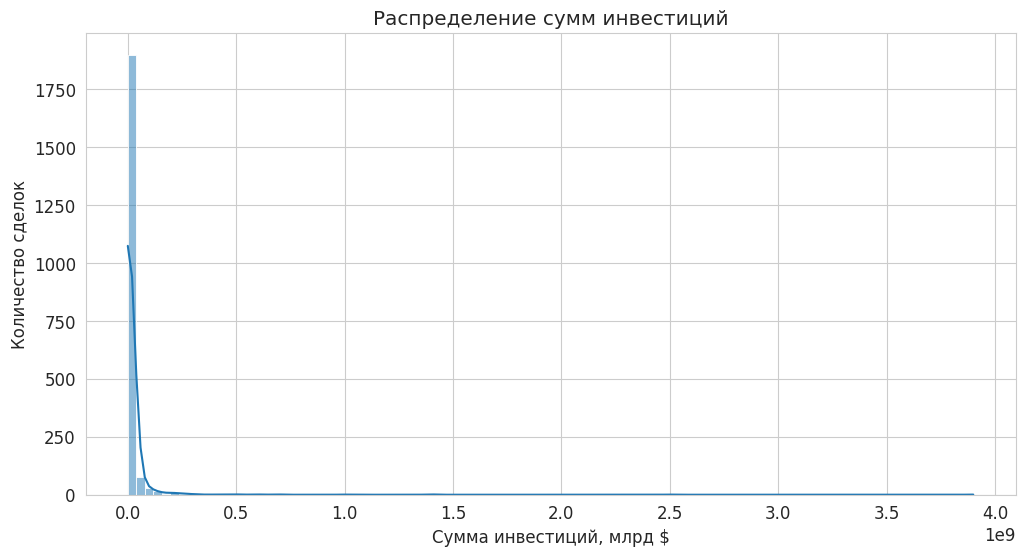

In [19]:
# Гистограмма
sns.histplot(df['Amount'], bins=100, kde=True)
ax = plt.gca()
ax.set_title('Распределение сумм инвестиций')
ax.set_xlabel('Сумма инвестиций, млрд $')
ax.set_ylabel('Количество сделок')

Видно, что данные сосредоточены около 0, и график не даёт никакой полезной информации. Попробуем использовать логарифмическую шкалу, чтобы график стал наглядным

Анализ распределения сумм инвестиций:


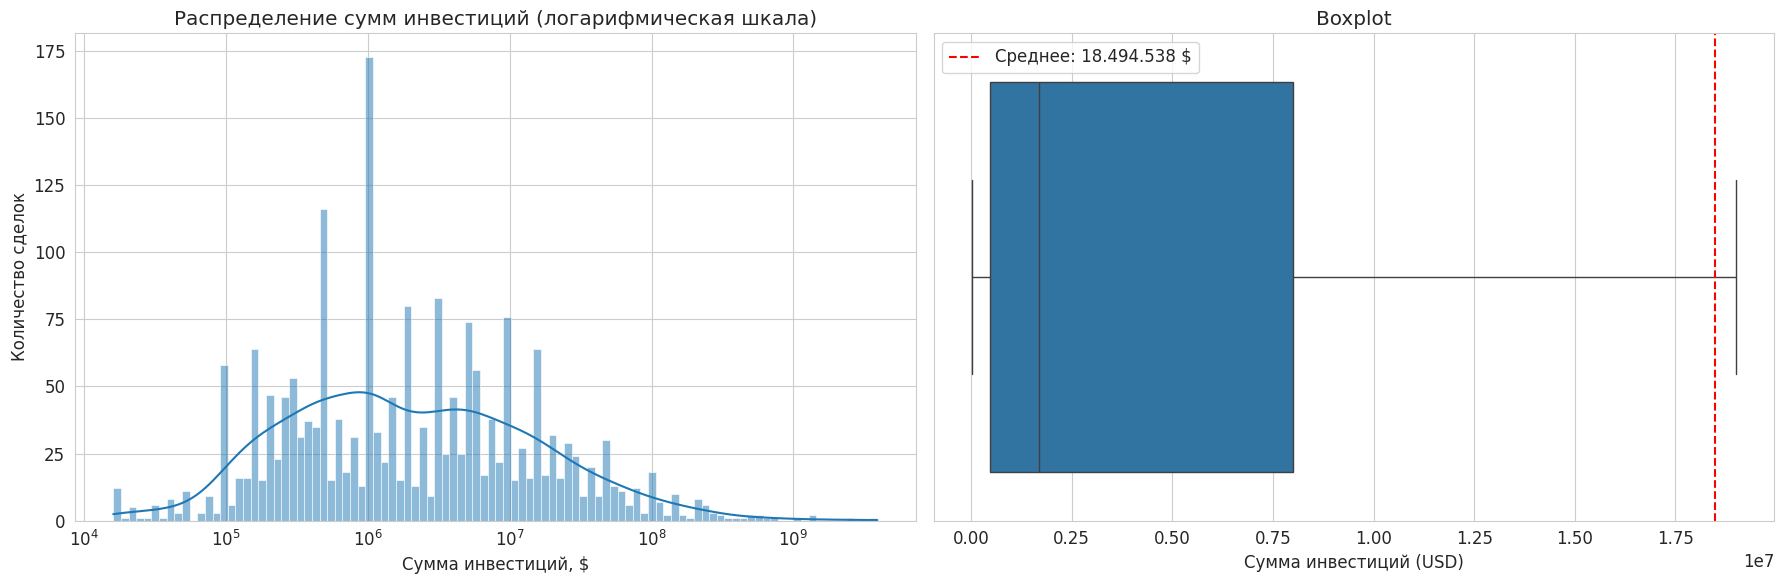

Статистические характеристики: 
Средняя сумма инвестиций: $18.494.538 = $1.8e+07
Среднеквадратичное отклонение суммы инвестиций: $121.634.626 = $1.2e+08
count    2.056000e+03
mean     1.849454e+07
std      1.216346e+08
min      1.600000e+04
25%      4.690000e+05
50%      1.700000e+06
75%      8.000000e+06
max      3.900000e+09
Name: Amount, dtype: float64


In [20]:
#Анализ распределения сумм инвестиций
def amount_distribution(df):
  fig, ax = plt.subplots(1, 2, figsize=(18, 6))

  # Гистограмма
  sns.histplot(df['Amount'], bins=100, kde=True, ax=ax[0], log_scale=True)
  ax[0].set_title('Распределение сумм инвестиций (логарифмическая шкала)')
  ax[0].set_xlabel('Сумма инвестиций, $')
  ax[0].set_ylabel('Количество сделок')

  # BoxPlot
  sns.boxplot(x=df['Amount'], ax=ax[1], showfliers=False)
  ax[1].axvline(df['Amount'].mean(), color='red', linestyle='--', label=f'Среднее: {df["Amount"].mean():,.0f} $'.replace(',', '.'))
  ax[1].set_title('Boxplot')
  ax[1].set_xlabel('Сумма инвестиций (USD)')
  ax[1].legend()

  plt.tight_layout()
  plt.show()

  # Статистические характеристики
  print("Статистические характеристики: ")
  print(f"Средняя сумма инвестиций: ${round(df['Amount'].mean()):,} = ${round(df['Amount'].mean()):.1e}".replace(',', '.').replace('.0e', 'e'))
  print(f"Среднеквадратичное отклонение суммы инвестиций: ${round(df['Amount'].std()):,} = ${round(df['Amount'].std()):.1e}".replace(',', '.').replace('.0e', 'e'))
  print(df['Amount'].describe())
  pass

print("Анализ распределения сумм инвестиций:")
amount_distribution(df)

Мы можем заключить:

*   Распределение очевидно не нормальное (но на
всякий случай можем провести Тест Шапиро-Уилка)
*   Засчет того, что порядок объема инвестиций варьируется от $10^4$ до $10^9$, то его среднее лежит выше 3 квартиля, а медиана (второй квартиль) ближе к первому квартилю, чем к третьему.
*  Мы видим, что большинство инвестиций примерно равны $10^6$, и медиана имеет такой же порядок.

**И так, ключевые проблемы на этом шаге:**

1. Экстремальная асимметрия:

Медиана (1.7M) в 10 раз меньше среднего (18.5M), т. е. 75% данных ≤ 8M, но максимальное значение 3.9B = 3900B
2. Огромный разброс:

Размах значений: от 16k до 3.9B (разница в 243750 раз)



In [21]:
#Проверка на нормальность
from scipy.stats import shapiro

p_value = shapiro(df['Amount'])[1]
if p_value < 0.01:
  print(f"{p_value}\nСуммы инвестиций не имеют нормального распределения")
else:
  print("Суммы инвестиций имеют нормальное распределение")

3.187602401536183e-71
Суммы инвестиций не имеют нормального распределения


**Шаг 3. Распределение инвестиций по времени**

Посмотрим на зависимость количества инвестиций от времени: по годам и месяцам. Стоит учесть, что минимальная дата 2015-01-02, а максимальная 2020-01-13 (это мы узнале на шаге 1 из df.describe()), поэтому возьмём данные только за 2015 - 2019 года включительно

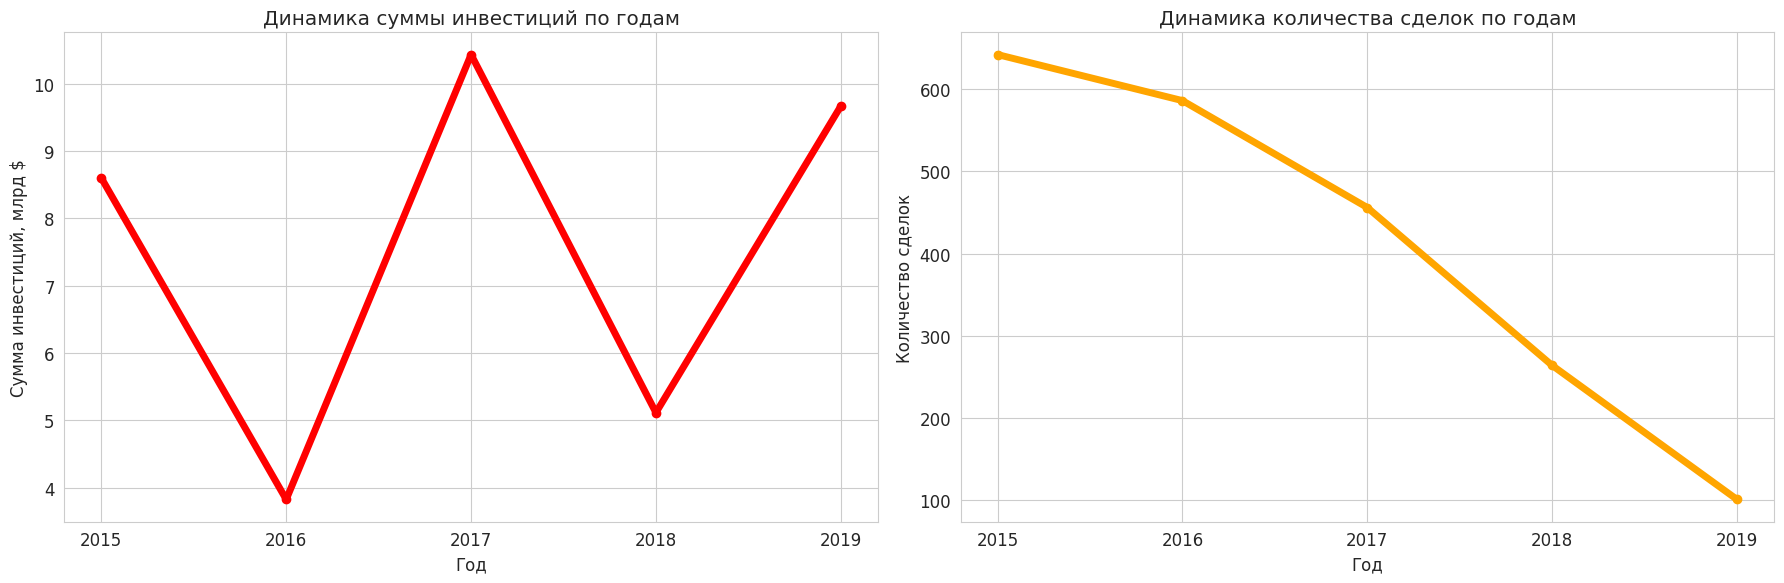

In [22]:
mask_year = df['Date'].dt.year<2020
yearly_trend = df[mask_year].groupby(df['Date'].dt.year)['Amount'].agg(['sum', 'count'])

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
years = [2015, 2016, 2017, 2018, 2019]
yearly_trend['sum'] = yearly_trend['sum'].apply(lambda x: x / 1000000000)

yearly_trend['sum'].plot(kind='line', marker='o', color='r', ax=ax[0], linewidth=5)
ax[0].set_title('Динамика суммы инвестиций по годам')
ax[0].set_xlabel('Год')
ax[0].set_ylabel('Сумма инвестиций, млрд $')
ax[0].set_xticks(years)
ax[0].set_xticklabels(years)

yearly_trend['count'].plot(kind='line', marker='o', color='orange', ax=ax[1], linewidth=5)
ax[1].set_title('Динамика количества сделок по годам')
ax[1].set_xlabel('Год')
ax[1].set_ylabel('Количество сделок')
ax[1].set_xticks(years)
ax[1].set_xticklabels(years)

#yearly_trend.info()

plt.tight_layout()
plt.show()

Видим, что количество сделок сумма инвестиций по любым четным годам, меньше чем по любым нечетным, а количество сделок строго убывало с каждым годом.

Теперь изучим сезонность сделок: посчитаем сумму и количество инвестиций по каждому месяцу за все 5 лет сразу:

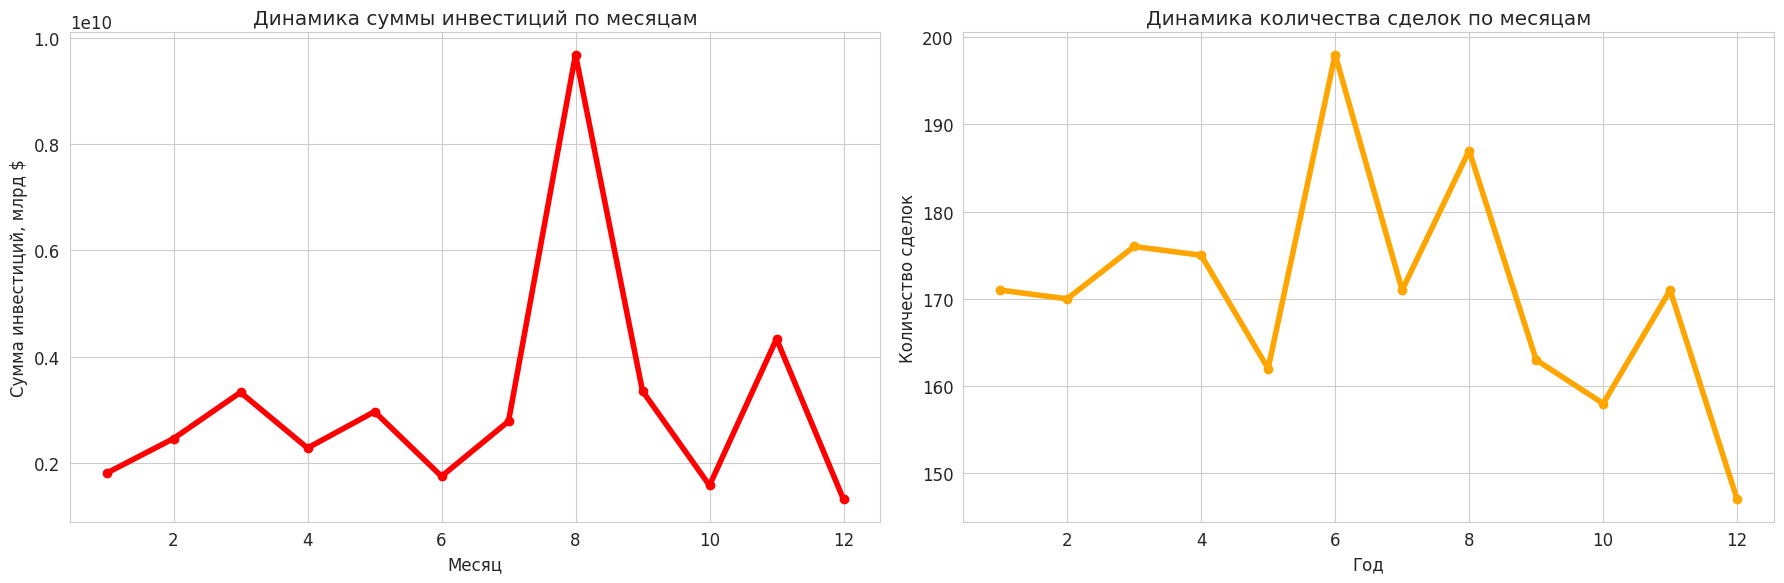

In [23]:
#data = np.log1p(df['Amount'])
#df['log_Amount'] = data
monthly_trend = df[mask_year].groupby(df['Date'].dt.month)['Amount'].agg(['sum', 'count'])

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
months = [f'0{i % 12 + 1}.{years[i // 12]}' if i % 12 < 9 else f'{i % 12 + 1}.{years[i // 12]}' for i in range(60)]
#monthly_trend['sum'] = monthly_trend['sum'].apply(lambda x: x / 1000000000)

monthly_trend['sum'].plot(kind='line', marker='o', color='r', ax=ax[0], linewidth=4)
ax[0].set_title('Динамика суммы инвестиций по месяцам')
ax[0].set_xlabel('Месяц')
ax[0].set_ylabel('Сумма инвестиций, млрд $')
#ax[0].set_xticks(months)
#ax[0].set_xticklabels(months)

monthly_trend['count'].plot(kind='line', marker='o', color='orange', ax=ax[1], linewidth=4)
ax[1].set_title('Динамика количества сделок по месяцам')
ax[1].set_xlabel('Год')
ax[1].set_ylabel('Количество сделок')
#ax[1].set_xticks(months)
#ax[1].set_xticklabels(months)

#yearly_trend.info()

plt.tight_layout()
plt.show()

Мы видим, что максимальная сумма инвестиций у нас в августе, хотя количество заключаемых сделок больше всего летом. Но стоит вспомнить, что размеры инвестиций у нас очень неоднородные, поэтому такой всплеск в сумме связан с тем, что размеры инвестиций в августе были аномально высокие, при том что количество сделок не превышало нормы.

**Вывод на данном шаге:**

1. Инвестиции по годам:

Объемы инвестиций варьировались от года к году, но количество сделок сугубо убывало
2. Сезонность инвестиций:

Чаще всего в стартапы вкладываются летом (преимущественно в июне), а меньше всего - в декабре, в котором и объем инвестиций самый низкий





**Шаг 4. Распределение инвестиций по индустриальным категориям**

Не менее важно изучить (а то и более), стартапы какой области являются самыми привлекательными для инвестирования:

*   Сделаем тепловую гистограмму топ-10 вертикалей индустрии
*   Сделаем круговую диаграмму
*   Cделаем отдельный список топ-10 вертикалей индустрии



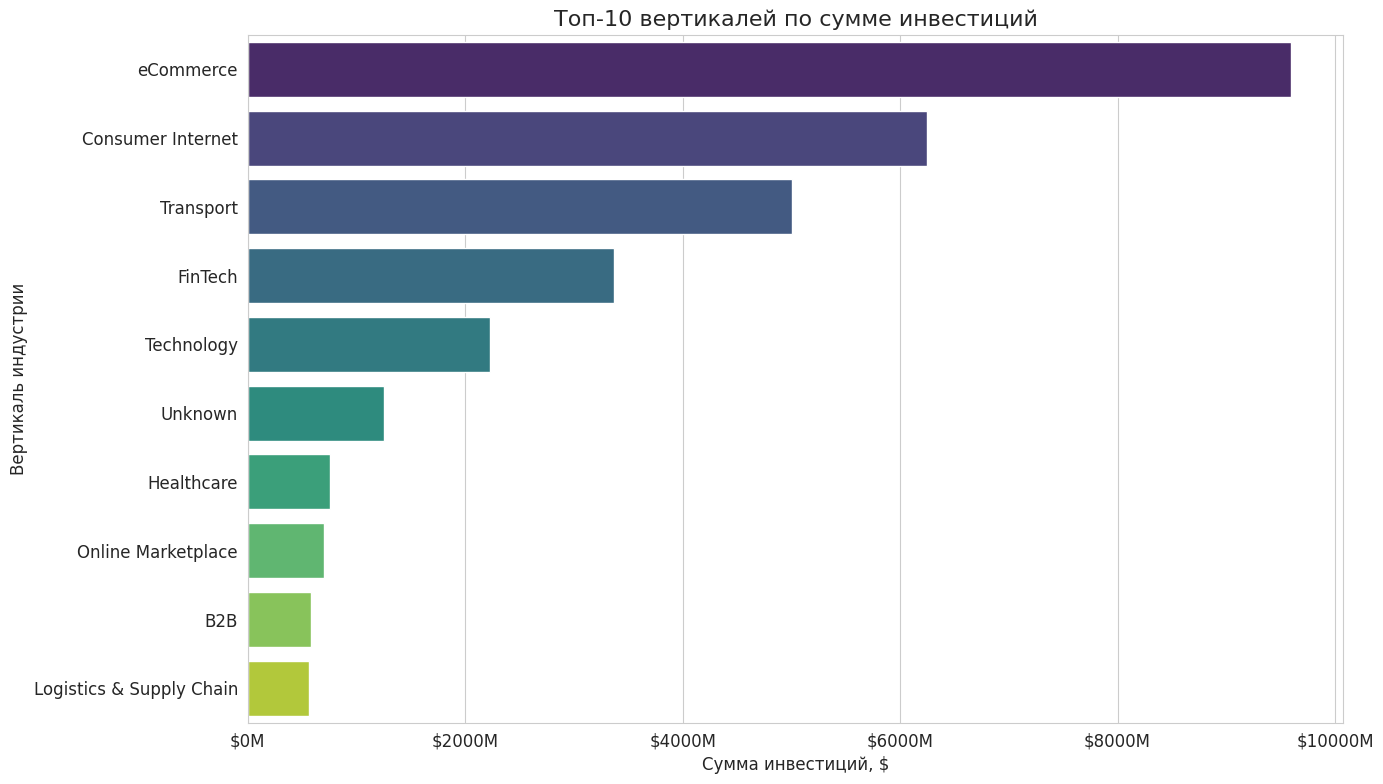

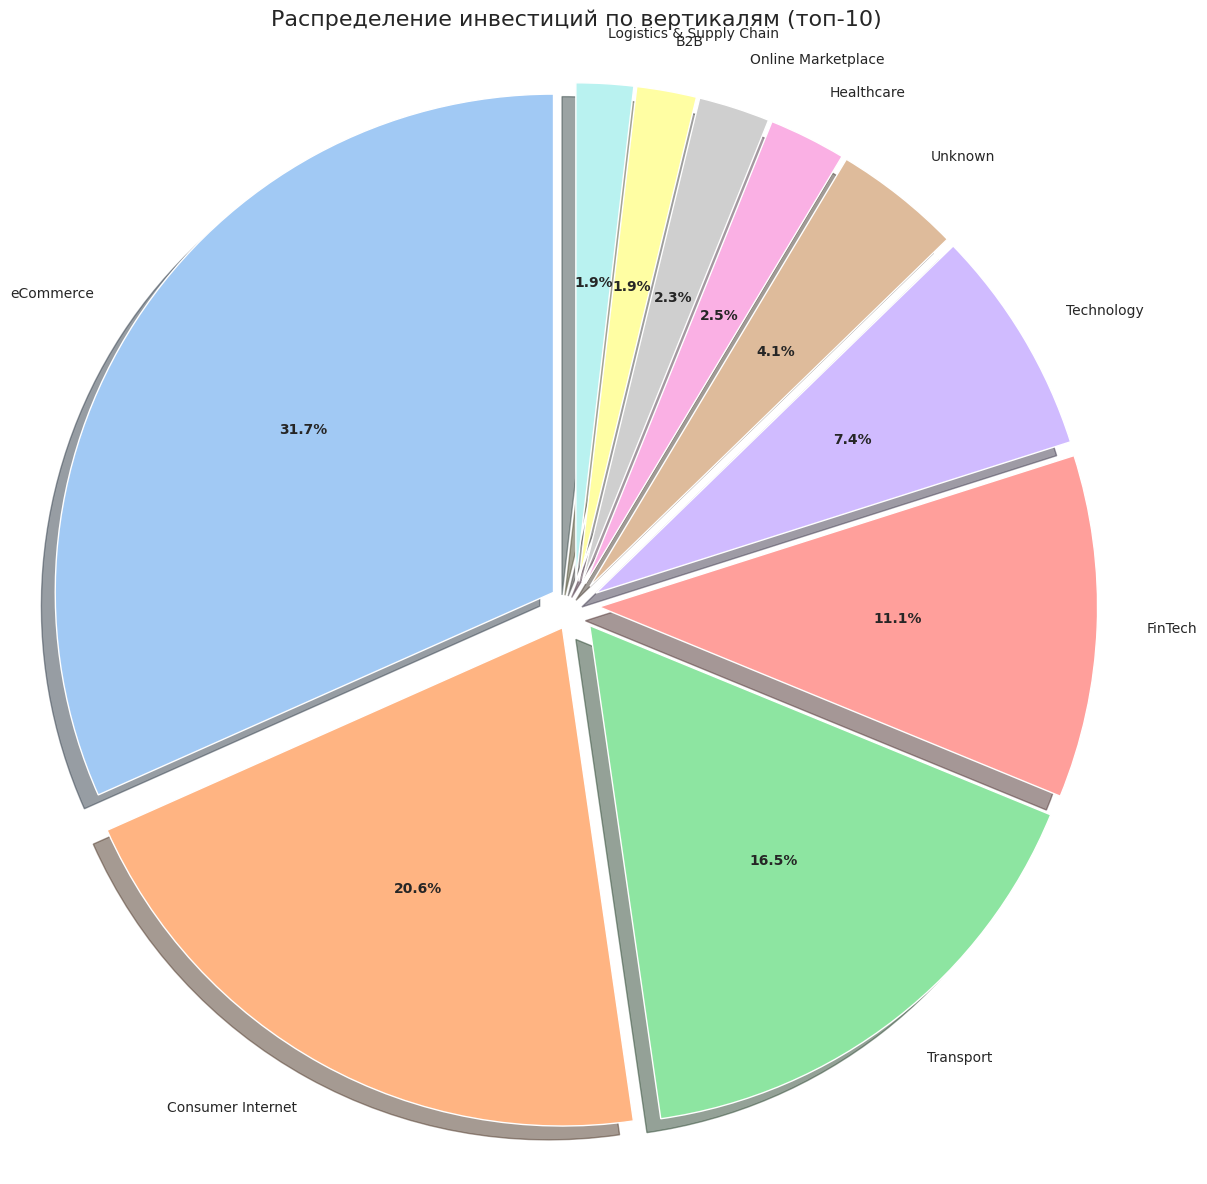


Топ-10 вертикалей индустри:
               Вертикаль Сумма инвестиций Доля рынка
               eCommerce         $9595.8M      31.7%
       Consumer Internet         $6247.8M      20.6%
               Transport         $5007.6M      16.5%
                 FinTech         $3367.3M      11.1%
              Technology         $2229.7M       7.4%
                 Unknown         $1250.1M       4.1%
              Healthcare          $758.1M       2.5%
      Online Marketplace          $700.1M       2.3%
                     B2B          $587.0M       1.9%
Logistics & Supply Chain          $563.1M       1.9%


In [24]:
#Подготовка данных
vertical_totals = df.groupby('Vertical')['Amount'].sum().sort_values(ascending=False)
top_verticals = vertical_totals.head(10)

#Гистограмма распределения
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_verticals.values, y=top_verticals.index, palette='viridis')
def money_formatter(x, pos):
    return f'${x/1e6:.0f}M'

ax.xaxis.set_major_formatter(FuncFormatter(money_formatter))
plt.title('Топ-10 вертикалей по сумме инвестиций', fontsize=16)
plt.xlabel('Сумма инвестиций, $', fontsize=12)
plt.ylabel('Вертикаль индустрии', fontsize=12)
plt.tight_layout()
plt.show()

# Круговая диаграмма
plt.figure(figsize=(12, 12))
explode = [0.05] * len(top_verticals)  # Выделяем все сектора
colors = sns.color_palette('pastel', len(top_verticals))
wedges, texts, autotexts = plt.pie(
    top_verticals,
    labels=top_verticals.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 10}
)

# Увеличиваем размер подписей
plt.setp(autotexts, size=10, weight="bold")
plt.title('Распределение инвестиций по вертикалям (топ-10)', fontsize=16)
plt.axis('equal')  # Круглая форма
plt.tight_layout()
plt.show()

# Таблица
print("\nТоп-10 вертикалей индустри:")
top_verticals_table = top_verticals.reset_index()
top_verticals_table.columns = ['Вертикаль', 'Сумма инвестиций']
top_verticals_table['Доля рынка'] = (top_verticals_table['Сумма инвестиций'] / top_verticals_table['Сумма инвестиций'].sum() * 100).round(1)
top_verticals_table['Сумма инвестиций'] = top_verticals_table['Сумма инвестиций'].apply(lambda x: f"${x/1e6:.1f}M")
top_verticals_table['Доля рынка'] = top_verticals_table['Доля рынка'].apply(lambda x: f"{x:.1f}%")
print(top_verticals_table.to_string(index=False))

Мы видим, что самыми привлекательными напрпвлениями являются:


1.   *eCommerce* - электронная коммерция - это интернет площадки, как правило B2C, то есть маркетплейсы, онлайн-магазины
2.   *Consumer Internet* - предоставители цифровых услуг, например соц. сети, или системы для умного дома
3.   *Transport* - транспортная отрасль
4.   *FinTech* - финансовые технологии: платежные решения, эквайринг, кредитование и т. п.
5.   *Technology* - на первый взгялд, неочевидно, чем именно занимаются стартапы этой категории, поэтому посмотрим субвертикали записей в датасете с данной вертикалью:



In [25]:
mask_tech = df['Vertical']=='Technology'
df[mask_tech].head(10)

,№,Name,Vertical,SubVertical,City,Investor,InvestmentType,Amount,Date
7,8,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,SERIES A,6000000.0,2019-12-12
10,11,Rivigo,Technology,Logistics Services and Solutions,Gurugram,"SAIF Partners, Spring Canter Investment Ltd.",SERIES F,20000000.0,2019-12-13
111,112,Increff,Technology,Supply-chain technology solutions,Bangalore,"021 Capita, Binny Bansal",SERIES A,3000000.0,2019-04-17
160,161,AutoGrid,Technology,AI-Based Energy Optimisation and Control Provider,Bangalore,"CLP Holdings Group, Innogy, \\xc3\\x98rstead, ...",Private Equity,32000000.0,2018-09-11
177,178,Observe AI,Technology,AI Based Solutions Platform,Bangalore,"Nexus Venture Partners, MGV, Liquid 2 Ventures...",Private Equity,8000000.0,2018-08-13
182,183,Pi Ventures,Technology,Applied Artificial Intelligence and IoT focuse...,Bangalore,CDC Group plc\\xc2\\xa0,Private Equity,6000000.0,2018-08-22
211,212,VTION,Technology,Media Analytics,Gurugram,"AngelList, Rahul Khanna, Rajeev Arora and Ram ...",Angel,280000.0,2018-07-23
212,213,Log9 Materials,Technology,Nanotechnology Company Specializing In Graphene,Bangalore,"Metaform Ventures, Hemant Luthra, Micro ventur...",Angel,436000.0,2018-07-23
217,218,iqlect,Technology,Data Analytics Firm,Bangalore,Ventureast and Exfinity,Angel,2500000.0,2018-07-25
226,227,Digiconectt,Technology,Sales Analytics and Enablement Platform,Bangalore,Aspire Logistics LLC,Angel,125000.0,2018-06-04


Наблюдается очень "разношерстные" стартапы, поэтому тяжело их описать в несольких словах. Но тут напрашивается вопрос: наверное, стоит изучить субвертикали по каждому направлению подробнее, поэтому сделаем иерархическую круговую диаграмму для топ-5 вертикалей:

In [26]:
import plotly.express as px

# 1. Топ-5 вертикалей
top_verticals = df.groupby('Vertical')['Amount'].sum().nlargest(5).index.tolist()

# 2. Исключаем Unknown
top_df = df[
    (df['Vertical'].isin(top_verticals)) &
    (df['SubVertical'] != 'Unknown') &
    (df['SubVertical'].notna())
].copy()

# 3. Для каждой вертикали выбираем топ-5 подкатегорий
top_subverticals = []
for vertical in top_verticals:
    vertical_df = top_df[top_df['Vertical'] == vertical]
    top_subs = vertical_df.groupby('SubVertical')['Amount'].sum().nlargest(5).index.tolist()
    top_subverticals.extend([(vertical, sub) for sub in top_subs])

top_combinations = pd.DataFrame(top_subverticals, columns=['Vertical', 'SubVertical'])
sunburst_data = top_combinations.merge(top_df, on=['Vertical', 'SubVertical'])

# 3. Группируем данные
sunburst_grouped = sunburst_data.groupby(['Vertical', 'SubVertical'], as_index=False).agg(
    Total_Amount=('Amount', 'sum'),
    Deal_Count=('Amount', 'count')
)

# 4. Создаем Sunburst Chart
fig = px.sunburst(
    sunburst_grouped,
    path=['Vertical', 'SubVertical'],
    values='Total_Amount',
    color='Deal_Count',
    color_continuous_scale='Blues',
    hover_data=['Total_Amount', 'Deal_Count'],
    title='Топ-5 вертикалей с топ-5 подкатегориями',
    width=800,
    height=800
)
fig.update_traces(
    textinfo="label+percent parent",
    hovertemplate=(
        "<b>%{label}</b><br>"
        "Сумма: $%{customdata[0]:,.0f}<br>"
        "Сделки: %{customdata[1]}"
    ),
    insidetextorientation='radial'
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    margin=dict(t=50, l=0, r=0, b=0)
)
fig.show()

# 5. Таблица
print("\nДетализация по подкатегориям:")
summary_table = sunburst_grouped.sort_values(['Vertical', 'Total_Amount'], ascending=[True, False])
summary_table['Total_Amount_M'] = (summary_table['Total_Amount'] / 1e6).round(1)
print(summary_table[['Vertical', 'SubVertical', 'Total_Amount_M', 'Deal_Count']].to_string(index=False))


Детализация по подкатегориям:
         Vertical                                    SubVertical  Total_Amount_M  Deal_Count
Consumer Internet                       App based cab aggregator           330.0           1
Consumer Internet                    Online Grocery & Food Store           300.0           1
Consumer Internet                             Cab Aggregator App           260.0           1
Consumer Internet               Branded Budget Hotels Aggregator           250.0           1
Consumer Internet              Branded budget hotels marketplace           250.0           1
          FinTech                                  Mobile Wallet          1000.0           1
          FinTech                            Private Equity Firm           600.0           1
          FinTech                          Diversified Financial           270.0           1
          FinTech                       Tech based investor firm           200.0           1
          FinTech                      

Сделаем вывод для данного шага:

**Вывод на данном шаге:**

1.   Самыми привлекательными для инвестиций оказались напрвления, связанные с цифровыми технологиями: больше всего денег собрали онлайн маркетплейсы, онлайн-кошельки, однако еще немаловажным сектором оказлся транспорт: огормные инвестиции привлёк стартап "Rapido Bike Taxi", который, судя по всему, оказался очень востребован в Индии, предполагаю, что из-за большего начеления, спрос на транспорт крайне высок, поэтому кто-то придумал запустить в массы велосипедный таксопарк, что, естественно, будет доступнее и дешевеле для клиента, нежели такси-автомобиль, а для бизнеса будет выгоднее в плане понижения уровня необходимой квалификации водителей, а также дешевизне транспортых средств.
2.   Мы видим, что топ-5 вертикалей индустрий был сформирован всего на основе 32 сделок (из ~2000), что еще раз подчеркивает большой разброс сумм инвестиций в датасете



**Шаг 5. Распределение инвестиций по локации**

 Посмотрим сумму и количество инвестиций в каждом городе списка:


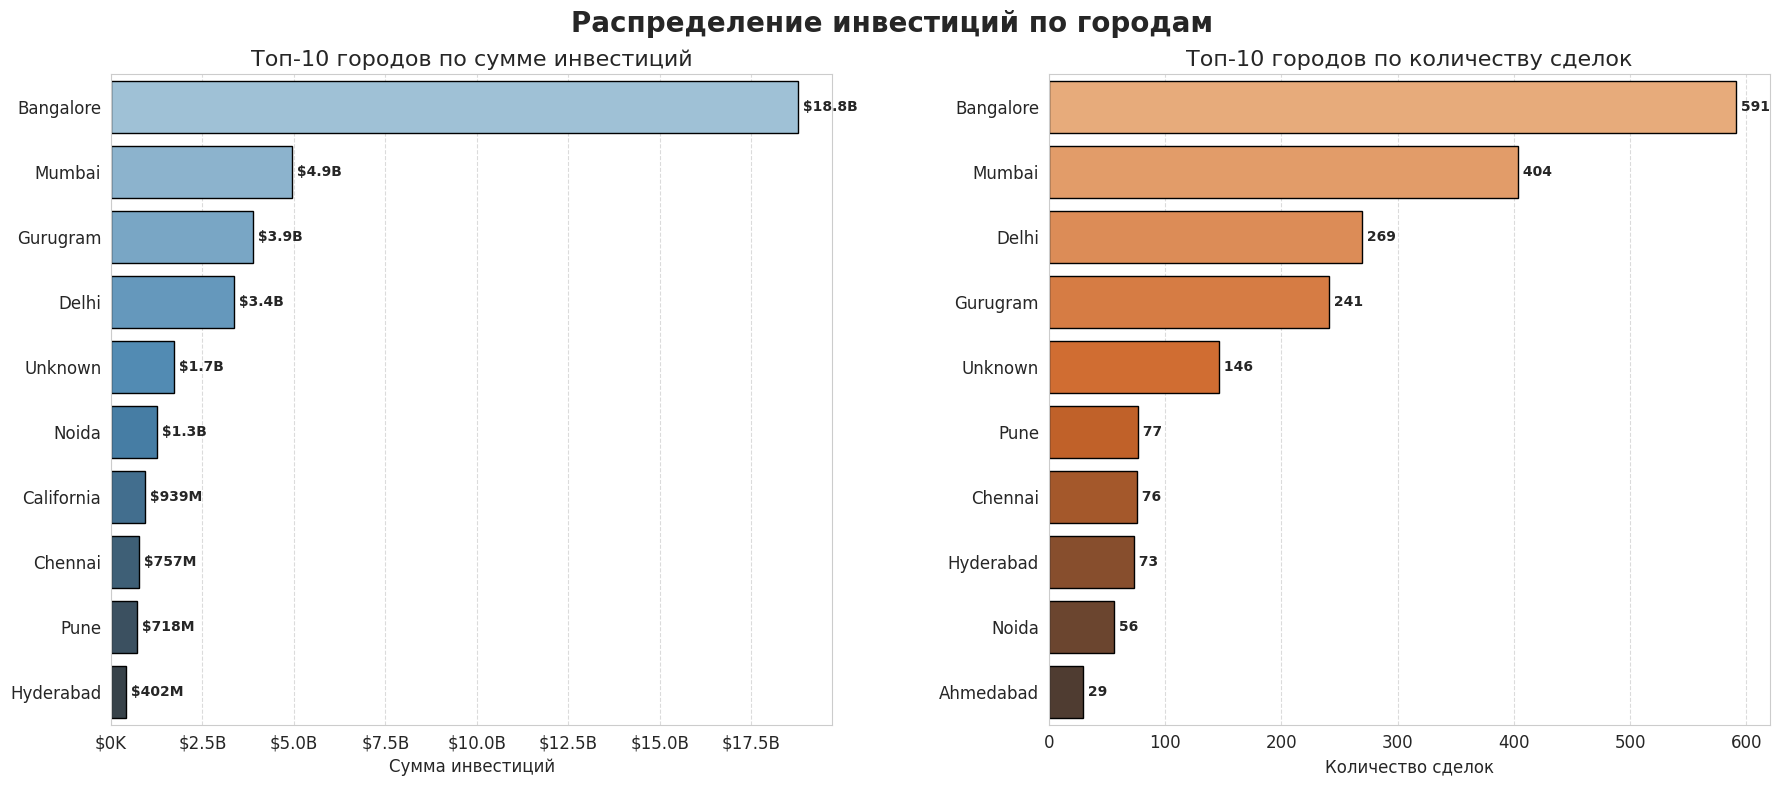


Полная статистика по городам:
         City Total_Amount  Deal_Count
    Bangalore       $18.8B         591
       Mumbai        $4.9B         404
     Gurugram        $3.9B         241
        Delhi        $3.4B         269
      Unknown        $1.7B         146
        Noida        $1.3B          56
   California        $939M           5
      Chennai        $757M          76
         Pune        $718M          77
    Hyderabad        $402M          73
    Faridabad        $252M           2
     Tulangan        $200M           1
San Francisco        $187M           2
       Jaipur        $153M          14
    Ahmedabad        $120M          29


In [27]:
# Настройка стиля
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# 1. Группировка
city_stats = df.groupby('City').agg(
    Total_Amount=('Amount', 'sum'),
    Deal_Count=('Amount', 'count')
).reset_index()
top_cities_amount = city_stats.sort_values('Total_Amount', ascending=False).head(10)
top_cities_count = city_stats.sort_values('Deal_Count', ascending=False).head(10)

# 2. Функция форматирования (исправленная версия)
def money_formatter(x, pos=None):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.0f}M'
    else:
        return f'${x/1e3:.0f}K'

# 3. Гистограммы
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(
    x='Total_Amount',
    y='City',
    data=top_cities_amount,
    ax=ax1,
    palette='Blues_d',
    edgecolor='black'
)
ax1.xaxis.set_major_formatter(FuncFormatter(money_formatter))
ax1.set_title('Топ-10 городов по сумме инвестиций', fontsize=16)
ax1.set_xlabel('Сумма инвестиций', fontsize=12)
ax1.set_ylabel('')
ax1.grid(axis='x', linestyle='--', alpha=0.7)
for i, value in enumerate(top_cities_amount['Total_Amount']):
    ax1.text(value, i, f' {money_formatter(value)}',
            va='center', fontsize=10, fontweight='bold')

sns.barplot(
    x='Deal_Count',
    y='City',
    data=top_cities_count,
    ax=ax2,
    palette='Oranges_d',
    edgecolor='black'
)
ax2.set_title('Топ-10 городов по количеству сделок', fontsize=16)
ax2.set_xlabel('Количество сделок', fontsize=12)
ax2.set_ylabel('')
ax2.grid(axis='x', linestyle='--', alpha=0.7)
for i, value in enumerate(top_cities_count['Deal_Count']):
    ax2.text(value, i, f' {value:,}',
            va='center', fontsize=10, fontweight='bold')

plt.suptitle('Распределение инвестиций по городам', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.3)
plt.show()

# 4. Таблица
print("\nПолная статистика по городам:")
city_stats = city_stats.sort_values('Total_Amount', ascending=False)
city_stats['Total_Amount'] = city_stats['Total_Amount'].apply(lambda x: money_formatter(x)) #чтобы суммы красиво отображались
#city_stats = city_stats.drop('Total_Amount', axis=1)
print(city_stats.head(15).to_string(index=False))

**Вывод на данном шаге:** Полученные данные показывают абсолютное превосходство Бангалора как главного хаба стартапов Индии — он привлек $18.8 млрд (в 3.8 раз больше Мумбаи, занявшего второе место), заодно став лидером по количеству сделок (591). Далее по топу идут Бангалор, Мумбаи, Гургаон, Дели, которые концентрируют ~80% всех инвестиций, что свидетельствует о высокой географической концентрации капитала. Примечательно наличие неиндийских локаций (Калифорния, Сан-Франциско) в топ-15, вероятно, официально стартапы были запущены на их территории, а ведут деятельность в Индии. В некоторых городах происходило всего пару сделок, но при этом они вошли в топ-15 по ивестициями, что еще раз подчеркивает неоднородность распределения сумм ивестиций

**Шаг 6. Топы инвесторов и стартапов**

Просмотрим подробные топы по конкретным инвесторам и стартапам:

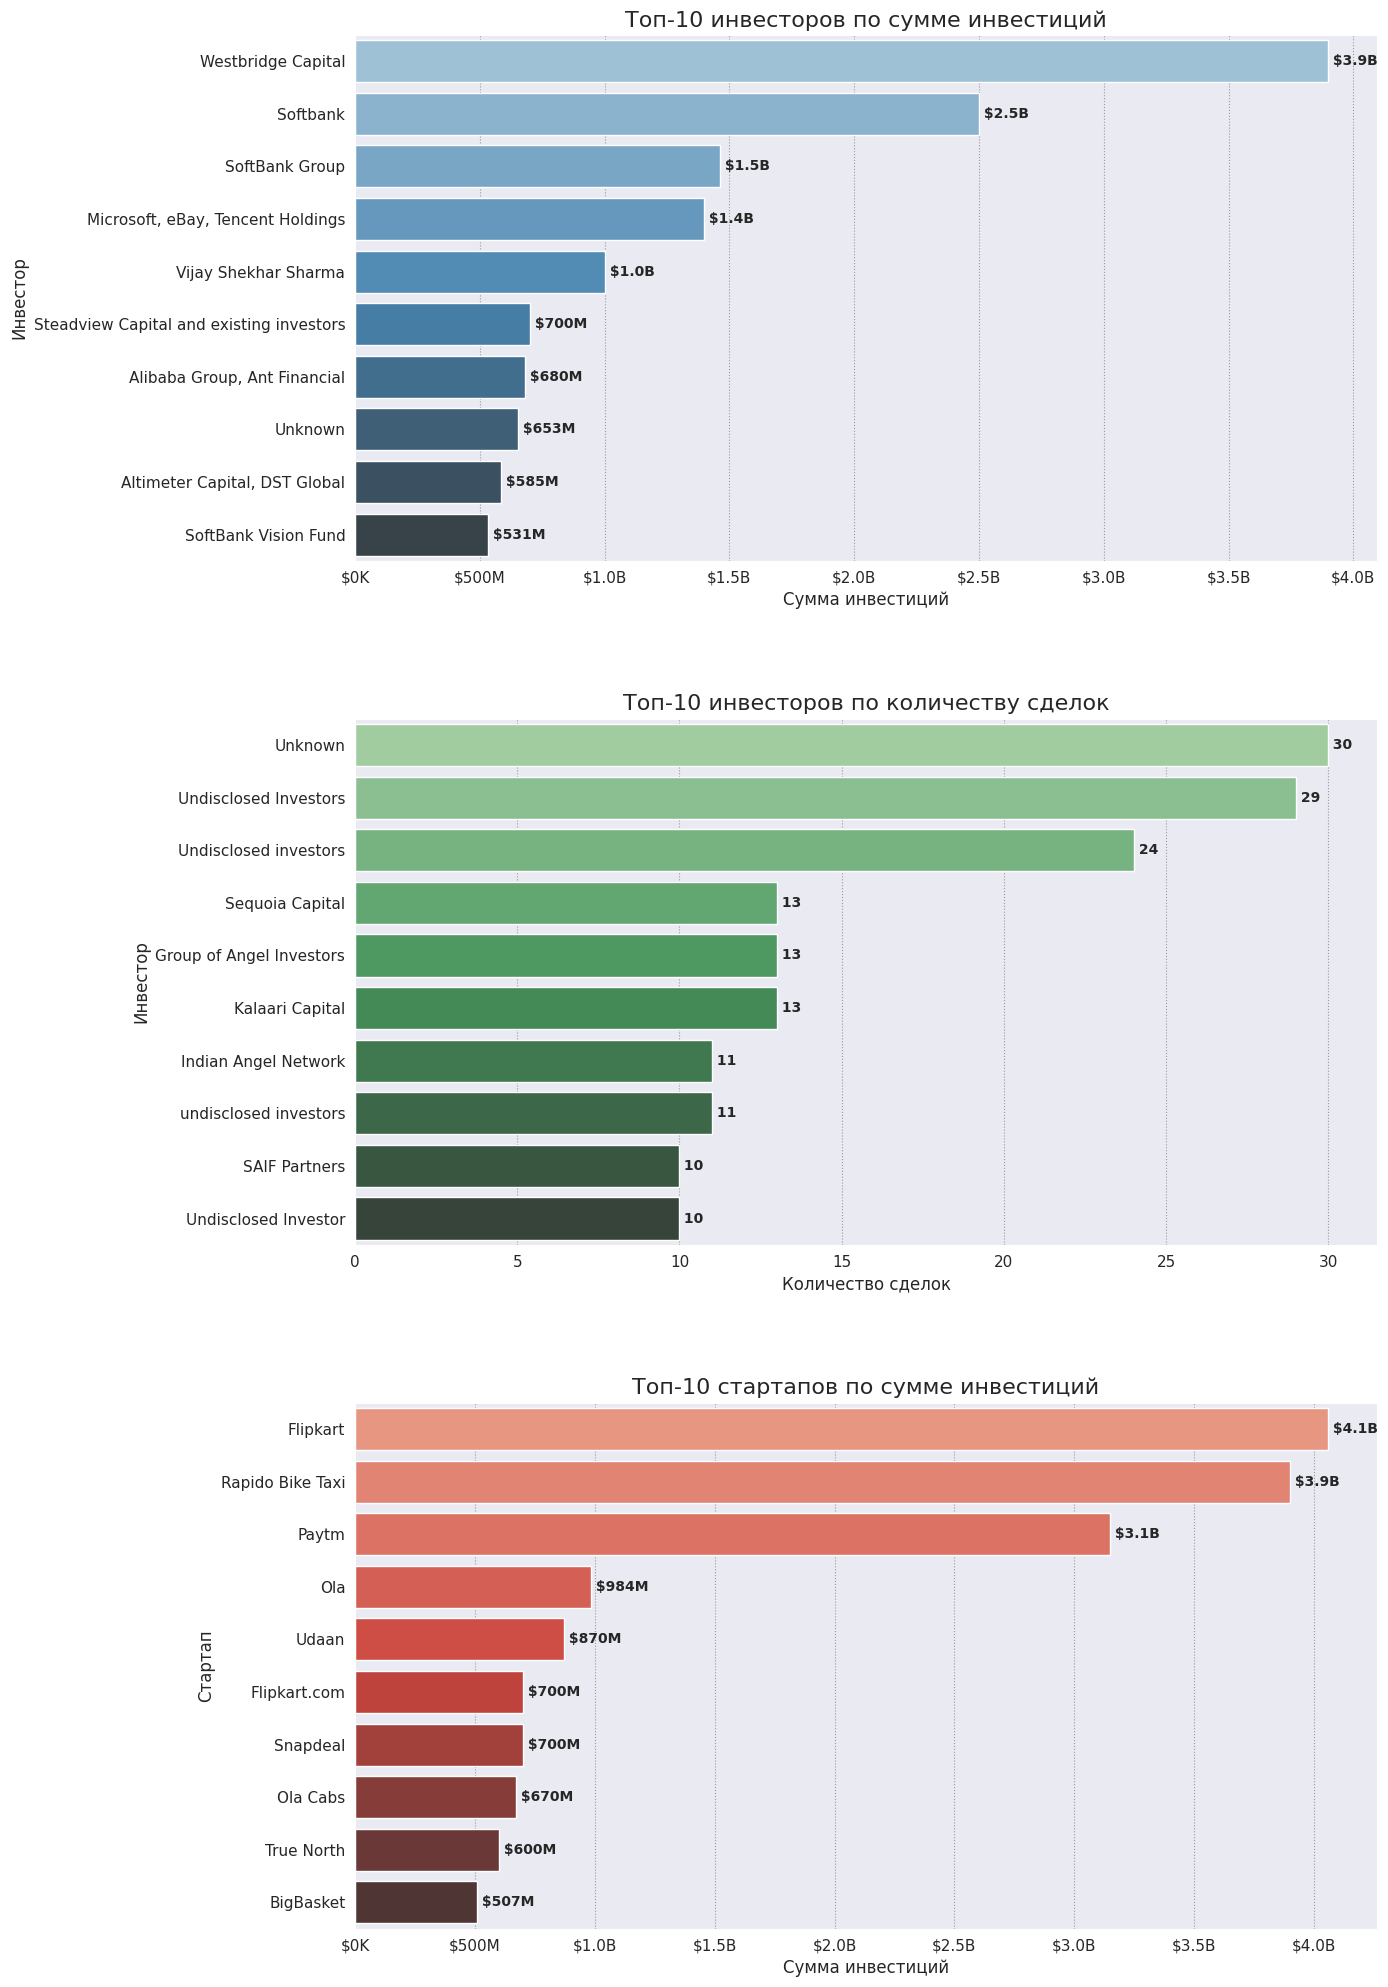

In [28]:
# Настройки стиля
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.style.use('whitegrid')
plt.rcParams['figure.figsize'] = (17, 11)
plt.rcParams['font.size'] = 11

# Топы
investor_amount = df.groupby('Investor')['Amount'].sum().nlargest(10)
investor_count = df['Investor'].value_counts().head(10)
startup_amount = df.groupby('Name')['Amount'].sum().nlargest(10)

# Графики
fig, ax = plt.subplots(3, 1, figsize=(14, 20))
# а)
sns.barplot(x=investor_amount.values, y=investor_amount.index, ax=ax[0], palette='Blues_d')
ax[0].set_title('Топ-10 инвесторов по сумме инвестиций', fontsize=16)
ax[0].set_xlabel('Сумма инвестиций', fontsize=12)
ax[0].set_ylabel('Инвестор', fontsize=12)
ax[0].xaxis.set_major_formatter(FuncFormatter(money_formatter))
for i, value in enumerate(investor_amount.values):
    ax[0].text(value, i, f' {money_formatter(value)}', va='center', fontsize=10, fontweight='bold')

# б)
sns.barplot(x=investor_count.values, y=investor_count.index, ax=ax[1], palette='Greens_d')
ax[1].set_title('Топ-10 инвесторов по количеству сделок', fontsize=16)
ax[1].set_xlabel('Количество сделок', fontsize=12)
ax[1].set_ylabel('Инвестор', fontsize=12)
for i, value in enumerate(investor_count.values):
    ax[1].text(value, i, f' {value}', va='center', fontsize=10, fontweight='bold')

# в)
sns.barplot(x=startup_amount.values, y=startup_amount.index, ax=ax[2], palette='Reds_d')
ax[2].set_title('Топ-10 стартапов по сумме инвестиций', fontsize=16)
ax[2].set_xlabel('Сумма инвестиций', fontsize=12)
ax[2].set_ylabel('Стартап', fontsize=12)
ax[2].xaxis.set_major_formatter(FuncFormatter(money_formatter))
for i, value in enumerate(startup_amount.values):
    ax[2].text(value, i, f' {money_formatter(value)}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()


Мы видим, что

*   Самые крупные инвесторы: Westbrige Capital, SoftBank, Microsoft и партнёры, Vijay Shekhar Sharma и т. д.
* По количеству седлок (без учета неизвестных) - это Angel Investors, Seqouia Capital, Kalaari Capital и другие
* Инвесторы не совпдают по сумме инвестиций и количесту сделок не совпадают

Рассмотрим полную информацию по топу инвесторов и по топу стартапов:



In [29]:
flag = True
top_investors = pd.DataFrame()
for investor in list(investor_amount.keys()):
  row = df.loc[df['Investor'] == investor]
  if flag:
    top_investors = row
    flag = False
  else:
    top_investors = pd.concat([top_investors, row], ignore_index=True)
top_investors = top_investors.sort_values('Amount', ascending=False)
top_investors['Amount'] = top_investors['Amount'].apply(money_formatter)
print("Топ инвесторов по сумме инвестиций")
top_investors.head(10)

Топ инвесторов по сумме инвестиций


,№,Name,Vertical,SubVertical,City,Investor,InvestmentType,Amount,Date
0,61,Rapido Bike Taxi,Transport,Bike Taxi,Bangalore,Westbridge Capital,SERIES B,$3.9B,2019-08-27
1,652,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,$2.5B,2017-08-11
2,831,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,$1.4B,2017-05-18
4,967,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,$1.4B,2017-03-21
5,32,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,$1.0B,2019-11-25
7,2649,Flipkart.com,Online Marketplace,Unknown,Bangalore,Steadview Capital and existing investors,Private Equity,$700M,2015-07-28
8,2460,Paytm,eCommerce,Unknown,Delhi,"Alibaba Group, Ant Financial",Private Equity,$680M,2015-09-29
17,189,True North,FinTech,Private Equity Firm,Mumbai,Unknown,Private Equity,$600M,2018-08-30
39,34,Udaan,B2B,Business development,Bangalore,"Altimeter Capital, DST Global",SERIES D,$585M,2019-10-02
41,136,Automation Anywhere,Automation,Robotics,California,SoftBank Vision Fund,SERIES B,$300M,2018-11-19


In [30]:
df = df.sort_values('Amount', ascending=False)
print("Топ стартапов")
df.head(15)

Топ стартапов


,№,Name,Vertical,SubVertical,City,Investor,InvestmentType,Amount,Date
60,61,Rapido Bike Taxi,Transport,Bike Taxi,Bangalore,Westbridge Capital,SERIES B,3.900000e+09,2019-08-27
651,652,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,2017-08-11
830,831,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,2017-05-18
966,967,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,2017-03-21
31,32,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,2019-11-25
2648,2649,Flipkart.com,Online Marketplace,Unknown,Bangalore,Steadview Capital and existing investors,Private Equity,7.000000e+08,2015-07-28
2459,2460,Paytm,eCommerce,Unknown,Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,2015-09-29
188,189,True North,FinTech,Private Equity Firm,Mumbai,Unknown,Private Equity,6.000000e+08,2018-08-30
33,34,Udaan,B2B,Business development,Bangalore,"Altimeter Capital, DST Global",SERIES D,5.850000e+08,2019-10-02
2470,2471,Snapdeal,eCommerce,Unknown,Delhi,"Alibaba, Foxconn, Softbank",Private Equity,5.000000e+08,2015-08-01


**Здесь напрашивается такой вывод :** топы количество сделок вовсе не совпадает с топом по сумме инвестицй, так, как крупные инвестиционные фонды произовдят всего одну серию инвестиций, но превышающую остальные в 1000 раз

In [31]:
#Приведем порядок строк в датасете в исходный
df = df.sort_values('№', ascending=True)

**Шаг 7. Анализ типов инвестиций**

Последним на данном этапе выясним, какие типы инвестиций преобладают на рынке

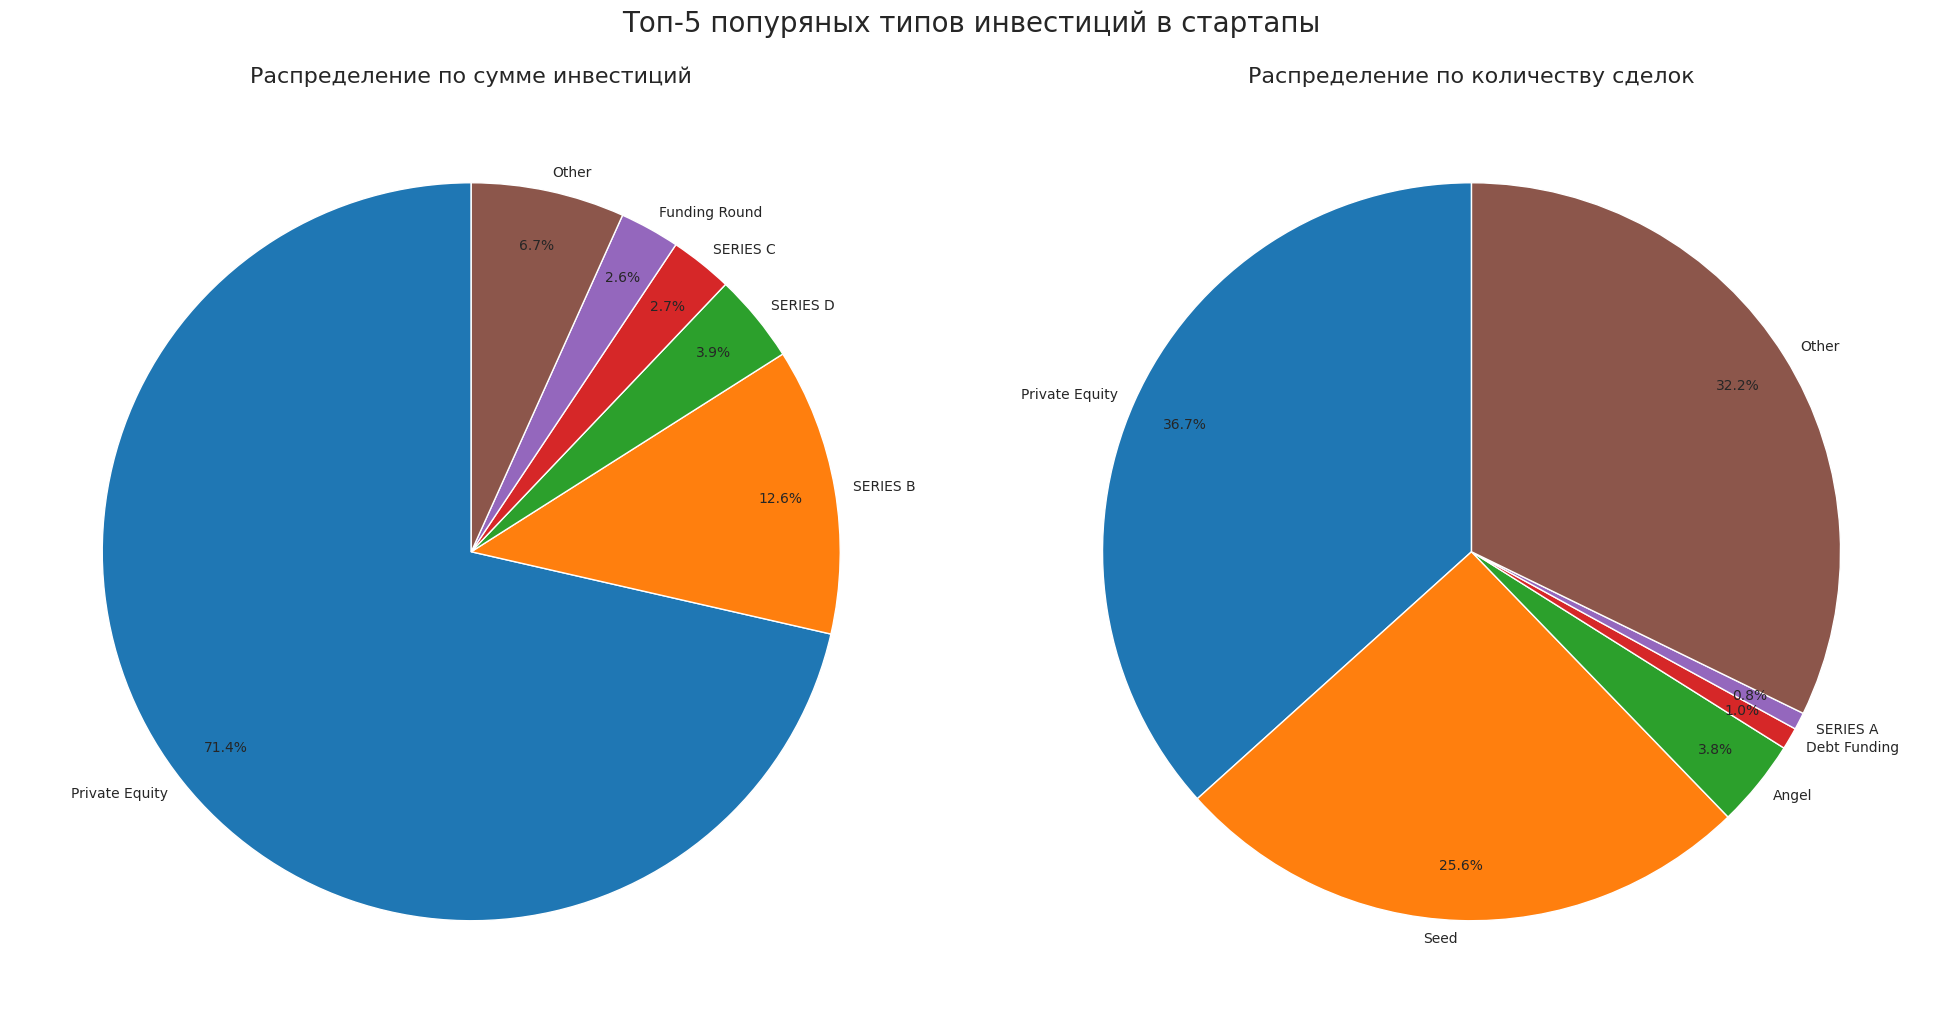

In [32]:
# Подготовка данных
investment_stats = df.groupby('InvestmentType').agg(
    Total_Amount=('Amount', 'sum'),
    Deal_Count=('Amount', 'count')
).sort_values('Total_Amount', ascending=False)

# Топ 10 типов по сумме
top_amount = investment_stats.nlargest(5, 'Total_Amount')
other_amount = investment_stats.iloc[5:]['Total_Amount'].sum()
top_amount.loc['Other'] = other_amount

# Топ 10 типов по количеству
top_count = investment_stats.nlargest(5, 'Deal_Count')
other_count = investment_stats.iloc[5:]['Deal_Count'].sum()
top_count.loc['Other'] = other_count

# круговые диаграммы
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# а)
ax1.pie(
    top_amount['Total_Amount'],
    labels=top_amount.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    labeldistance=1.05,
    textprops={'fontsize': 10}
)
ax1.set_title('Распределение по сумме инвестиций', fontsize=16)
# б)
ax2.pie(
    top_count['Deal_Count'],
    labels=top_count.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    labeldistance=1.05,
    textprops={'fontsize': 10}
)
ax2.set_title('Распределение по количеству сделок', fontsize=16)

plt.suptitle('Топ-5 попуряных типов инвестиций в стартапы', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

Пояснения по типам инвестиций:

* Private Equity - Прямые инвестиции в зрелые частные компании, обычно крупные суммы (>50M)
* SERIES [A-J] - Последовательные раунды финансирования (A - ранние, J - поздние стадии)
* Funding Round - Раунд без уточнения типа
* Pre-Series A - Переходное финансирование между Seed и Series A (2-10M)
* Angel -  частный инвестор, который вкладывает собственные средства в стартапы на ранних этапах развития(50-500K)
* Seed - Посевные (высокорисковые) инвестиции на ранней стадии (100K-2M)
* Debt Funding - Долговое финансирование (кредиты, конвертируемые ноты)
* Corporate Round - Стратегические инвестиции от корпораций
* Venture - Венчурное финансирование без указания раунда
* Crowdfunding - Краудфандинговые платформы
* Equity/Equity Funding - Финансирование через продажу доли
* Mezzanine Financing - Гибридный инструмент между долгом и акционерным капиталом
* Single Venture - Единичное инвестирование без последующих раундов
* Inhouse Funding - Финансирование от материнской компании
* Private Funding - Частные инвестиции без публичных деталей

**Вывод на данном шаге :** Мы наблюдаем, что больше всего инвестиций (и по количеству, и по деньгам) являются инвестициями в частные непубличные компании, которые представляют собой предприятия, не котирующиеся на фондовых биржах. Много денег также вложено уже не на первых стадиях инвестирования, а также не мало инвестиций (по количеству) было произведено в новчиковые стартапы, которые являются высокорисковым активом

**Вывод этапа 2** : разделим заключение на несколько тезисов:



1.   <u>Неоднородость инвестирования.</u> Имеется огромная разница между минимальными суммами инвесирования и максимальными, при этом относительно небольших инвестиций гораздо больше крупных, поэтому отношение порядков медианы к среднему к диспресии распределения сумм инвестиций равно 1:10:100
2.   <u>Спад количества инвестиций со временем.</u> Объём рынка инвестиций коллеблется каждый год, однако количество сделок строго убывает с 2015 по 2019
3.   <u>Самые привлекательные отрасли для инвестирования.</u> Самыми крупными по размеру вложений отраслями оказались eCommerce-платформы, FinTech-стартапы, а также сервис велосипедного такси : BikeTaxi.
4. <u>Топ городов для инвестирования.</u> Родинами самых крупных стартапов оказались Bangalore, Mumbai и третье место разделили Gurugram c Delhi, при этом они являются самыми рейтинговыми как по количеству сделок, так и по сумме инвестированных денег
5. <u>Самые крупные инвесторы.</u> Топ-3: Westbrige Capital (который как раз-таки инвестировал в BikeTaxi около 4 млрд долларов), SoftBank, Microsoft и партнёры, (оба из которых вложились в online-маркетплейс Flipcart). Все инвесторы из топа-3 являются иностранными для Индии компаниями. Vijay Shekhar Sharma расположился на 4 месте - это частный инвестор, который является одним из немногих Индийских инвесторов (по крайне мере в топе), главным стартапом которого оказался веб-кошелек Paytm.
6. <u>Популярные типы инвестиций</u> Самыми объемными во всех планах являются инвестицияи в частные непубличные компании, далее идут инвестиции не начальных рауднов, но также наблюдается тренд на инвестиции с высоким риском в самые молодые стартапы

Теперь, после обзорного анализа, можно перейти к более детальному разбору некоторых аспектов...

###**Этап 3. Детальный анализ**

**Шаг 1. Единороги**

*Стартапами-единорогами* называют стартапы, которые оцениваются на рынке свыше 1 млрд долларов. Но так как у нас нет информации об оценке, будем считать единорогами стартапы, которые собрали суммарно более 1 млрд долларов инвестиций (или хотябы 950 млн для полноты картины). Для начала выведем список таких стартапов, объём полученных средств и инвесторов, которые в них вложились:



In [33]:
# Запрос к датасету для формирования списка стартапов-единорогов
startup_totals = df.groupby("Name")["Amount"].sum().reset_index()
unicorns = startup_totals[startup_totals["Amount"] > 950_000_000]
df_unicorns = df[df["Name"].isin(unicorns["Name"])]
investor_contributions = df_unicorns.groupby(["Name", "Investor"])["Amount"].sum().reset_index()
investor_contributions = investor_contributions.merge(
    unicorns.rename(columns={"Amount": "Total_Startup_Amount"}),
    on="Name"
)

# Добавим колонку с долей инвестора
investor_contributions["SharePercent"] = (investor_contributions["Amount"] / investor_contributions["Total_Startup_Amount"]) * 100
hierarchy = {}
for _, row in investor_contributions.iterrows():
    name = row["Name"]
    investor = row["Investor"]
    amount = row["Amount"]
    percent = row["SharePercent"]

    if name not in hierarchy:
        hierarchy[name] = []

    hierarchy[name].append({
        "Investor": investor,
        "Amount": round(amount, 2),
        "SharePercent": round(percent, 2)
    })


print('Стартапы-единороги : ', end='')
for startup, investors in hierarchy.items():
    print(f"\n{startup} — Total: ${unicorns[unicorns['Name'] == startup]['Amount'].values[0]:,.2f}")
    k = 1
    for inv in investors:
        print(f"   {k}) {inv['Investor']}: ${inv['Amount']:,.2f} ({inv['SharePercent']:.2f}%)")
        k += 1



Стартапы-единороги : 
Flipkart — Total: $4,059,700,000.00
   1) Bennett, Coleman and Co. Ltd (BCCL): $38,700,000.00 (0.95%)
   2) Microsoft, eBay, Tencent Holdings: $1,400,000,000.00 (34.49%)
   3) Morgan Stanley: $50,000,000.00 (1.23%)
   4) Naspers: $71,000,000.00 (1.75%)
   5) Softbank: $2,500,000,000.00 (61.58%)

Ola — Total: $984,500,000.00
   1) Baillie Gifford, Falcon Edge Capital, Tiger Global, SoftBank Group, DST Global, Didi Kuaidi: $500,000,000.00 (50.79%)
   2) Falcon Edge Capital,\\xc2\\xa0 Capital Advisers: $104,500,000.00 (10.61%)
   3) SoftBank Group Corp: $330,000,000.00 (33.52%)
   4) Tekne Capital Management LLC: $50,000,000.00 (5.08%)

Paytm — Total: $3,148,950,000.00
   1) Alibaba Group, Ant Financial: $680,000,000.00 (21.59%)
   2) MediaTek Inc.: $60,000,000.00 (1.91%)
   3) One 97 Communications: $8,950,000.00 (0.28%)
   4) SoftBank Group: $1,400,000,000.00 (44.46%)
   5) Vijay Shekhar Sharma: $1,000,000,000.00 (31.76%)

Rapido Bike Taxi — Total: $3,900,000,000.0

А теперь визуализируем результат в виде TreeMap:

In [34]:
#Treemap
fig = px.treemap(
  investor_contributions,
  path=["Name", "Investor"],       # Иерархия
  values="Amount",                 # Размер блока
  color="Investor",                # Цвета по инвестору
  hover_data={
    "Amount": ":,.0f",
    "SharePercent": ":.2f",
    "Name": False,
    "Investor": False
  },
  title="Cтартапы-единороги"
)

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


Теперь мы видим, что крупнейшим стартапом является Flipkart - индийский онлайн маркетплейс (eComerce), у которого 5 инвесторов, крупнейшие из которых "Softbank" и "Microsoft, eBay, Tencent Holdings". На втором месте расположился уже ранее упомянутый Rapido Bike Taxi с единственным инвестором WestbrigeCapital, а на третьем также ранее известный Paytm, но теперь мы можем заметить, что самым крупным инвестором ялвяется опять же Softbank. При допущении до статуса единорога с порогом в 950 млн, у нас появился четветрый единорог - Ola - это сервис аггрегации такси. И опять же одинм из самых крупных инвесторов в него является Softbank. Также, стоит заметить, что все типы инвестийи в единорогов являются Private Equity, что подчеркивает популярность этого типа среди самых крупных инвесторов.

**Шаг 2. Геогорафический фактор инвестирования**

Теперь я хочу подробнее изучить влияние локации на выбор инвесторов: влияет ли локация стартапа на объём/количество инвестиций в него? Предлагается разобрать этот вопрос для сугубо Индийских городов:

In [35]:
df['City'].unique()

array(['Bangalore', 'Gurugram', 'Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'California', 'Amritsar',
       'Tulangan', 'Hyderabad', 'Burnsville', 'Santa Monica', 'Unknown',
       'Haryana', 'New York', 'Karnataka', 'Bhopal', 'Jaipur', 'Nagpur',
       'Indore', 'Ahmedabad', 'Rourkela', 'Bhubaneswar', 'Chandigarh',
       'Kolkata', 'Coimbatore', 'Udaipur', 'Surat', 'Goa', 'Gaya',
       'Vadodara', 'Missourie', 'Panaji', 'Gwalior', 'Kerala', 'Lucknow',
       'Trivandrum', 'Varanasi', 'Kanpur', 'Jodhpur', 'Boston', 'Belgaum',
       'Dallas', 'Udupi'], dtype=object)

Выделим из них только Индийские:

In [36]:
indian_cities = ['Bangalore', 'Gurugram', 'Delhi', 'Mumbai', 'Chennai', 'Pune',
    'Noida', 'Faridabad', 'Amritsar', 'Hyderabad', 'Haryana',
    'Karnataka', 'Bhopal', 'Jaipur', 'Nagpur', 'Indore', 'Ahmedabad',
    'Rourkela', 'Bhubaneswar', 'Chandigarh', 'Kolkata', 'Coimbatore',
    'Udaipur', 'Surat', 'Goa', 'Gaya', 'Vadodara',
    'Panaji', 'Gwalior', 'Kerala', 'Lucknow', 'Trivandrum', 'Varanasi',
    'Kanpur', 'Jodhpur', 'Belgaum', 'Udupi']

Далее я попросил DeepSeek создать словарь, где ключами будут это города, а значениями их население, в будущем используем эту информацию для аналитики. Также выкиненем из этого списка штаты, отставим только города:

In [37]:
city_population = {
    'Bangalore': 13608,     # Бангалор (столица Карнатаки)
    'Gurugram': 1400,       # Гуруграм (Харьяна)
    'Delhi': 32941,         # Дели (столица Индии)
    'Mumbai': 23355,        # Мумбаи (Махараштра)
    'Chennai': 11459,       # Ченнаи (Тамилнад)
    'Pune': 7549,           # Пуна (Махараштра)
    'Noida': 1200,          # Нойда (Уттар-Прадеш)
    'Faridabad': 1800,      # Фаридабад (Харьяна)
    'Amritsar': 1325,       # Амритсар (Пенджаб)
    'Hyderabad': 10804,     # Хайдарабад (Телингана)
    'Bhopal': 2037,         # Бхопал (столица Мадхья-Прадеш)
    'Jaipur': 3975,         # Джайпур (столица Раджастхана)
    'Nagpur': 2800,         # Нагпур (Махараштра)
    'Indore': 2218,         # Индаур (Мадхья-Прадеш)
    'Ahmedabad': 8000,      # Ахмадабад (Гуджарат)
    'Rourkela': 600,        # Роуркела (Одиша)
    'Bhubaneswar': 1138,    # Бхубанешвар (столица Одиши)
    'Chandigarh': 1192,     # Чандигарх (союзная территория)
    'Kolkata': 14963,       # Калькутта (Западная Бенгалия)
    'Coimbatore': 2165,     # Коимбатур (Тамилнад)
    'Udaipur': 550,         # Удайпур (Раджастхан)
    'Surat': 7068,          # Сурат (Гуджарат)
    'Gaya': 500,            # Гая (Бихар)
    'Vadodara': 2167,       # Вадодара (Гуджарат)
    'Panaji': 114,          # Панаджи (столица Гоа)
    'Gwalior': 1200,        # Гвалиор (Мадхья-Прадеш)
    'Lucknow': 3385,        # Лакхнау (столица Уттар-Прадеш)
    'Trivandrum': 957,      # Тривандрам (столица Кералы)
    'Varanasi': 1436,       # Варанаси (Уттар-Прадеш)
    'Kanpur': 3105,         # Канпур (Уттар-Прадеш)
    'Jodhpur': 1500,        # Джодхпур (Раджастхан)
    'Belgaum': 610,         # Белгаум (Карнатака)
    'Udupi': 150            # Удупи (Карнатака)
}

Теперь посчитаем корреляцию между населением города и общим объёмом инвестий в него:

In [38]:
from scipy.stats import pearsonr

# Запрос
city_investments = df.groupby('City')['Amount'].sum().reset_index()
city_investments.columns = ['City', 'Total_Investment']
population_df = pd.DataFrame(list(city_population.items()), columns=['City', 'Population'])
city_df = pd.merge(city_investments, population_df, on='City', how='inner')

# Корреляция и обработка

#city_df['Total_Investment'] = city_df['Total_Investment'].str.replace(',','') #убираем запятые
#city_df = city_df[city_df['Total_Investment'].str.isdigit()]
city_df['Total_Investment'] = city_df['Total_Investment'].astype('float64')
corr, p_value = pearsonr(city_df['Total_Investment'], city_df['Population'])
city_df = city_df.sort_values('Total_Investment', ascending=False)
city_df['Total_Investment'] = city_df['Total_Investment'].apply(money_formatter)

print("Данные по городам:")
print(city_df)
print(f"\nКорреляция Пирсона: {corr:.2f}")
#print(f"p-value: {p_value:.4f}")



Данные по городам:
           City Total_Investment  Population
2     Bangalore           $18.8B       13608
21       Mumbai            $4.9B       23355
12     Gurugram            $3.9B        1400
9         Delhi            $3.4B       32941
23        Noida            $1.3B        1200
7       Chennai            $757M       11459
25         Pune            $718M        7549
14    Hyderabad            $402M       10804
10    Faridabad            $252M        1800
16       Jaipur            $153M        3975
0     Ahmedabad            $120M        8000
6    Chandigarh             $47M        1192
27        Surat             $36M        7068
5   Bhubaneswar             $23M        1138
19      Kolkata             $16M       14963
30        Udupi             $12M         150
31     Vadodara              $7M        2167
11         Gaya              $6M         500
15       Indore              $5M        2218
8    Coimbatore              $4M        2165
26     Rourkela              $2M    

Корреляция 0.42 говорит о слабой (но положительной) зависимости между населением и объёмом инвестиций в стартапы города, скорее всего города в топе являются индустриальными центрами в Индии, поэтому организация там крупных стартапов распространена.

**Шаг 3. Самые популярные стартапы для инвестирования**

Я подумал, что стоит узнать о самых популярных стартапах в датасете в плане количества совершенных инвестициионых сделок

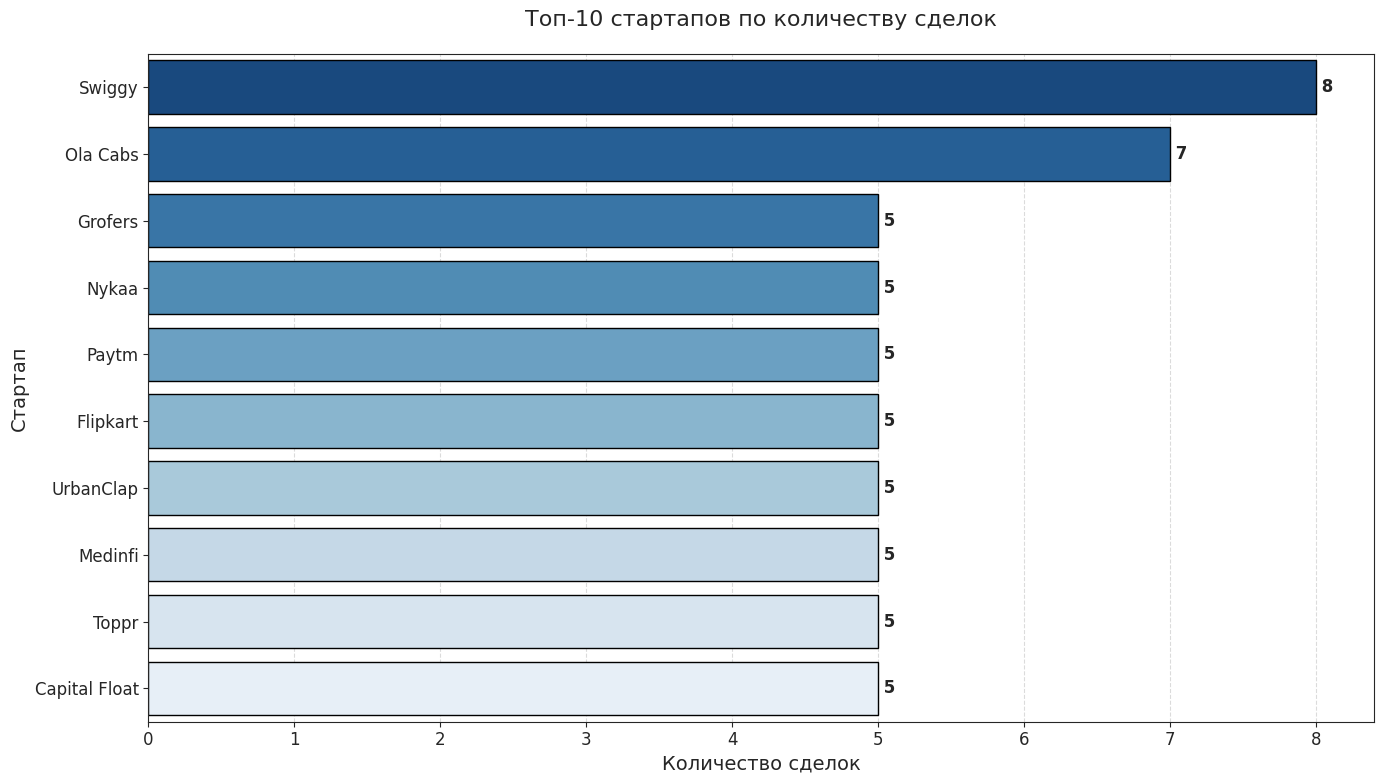

Топ-10 стартапов по количеству сделок:
--------------------------------------
      Startup  Deal Count
       Swiggy           8
     Ola Cabs           7
      Grofers           5
        Nykaa           5
        Paytm           5
     Flipkart           5
    UrbanClap           5
      Medinfi           5
        Toppr           5
Capital Float           5


In [39]:
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Запрос
top_startups = df['Name'].value_counts().head(10)
top_startups_df = pd.DataFrame({
    'Startup': top_startups.index,
    'Deal Count': top_startups.values
})

# Визуализация
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='Deal Count',
    y='Startup',
    data=top_startups_df,
    palette='Blues_r',
    edgecolor='black'
)
for i, value in enumerate(top_startups_df['Deal Count']):
    ax.text(value, i, f' {value}', va='center', fontsize=12, fontweight='bold')

plt.title('Топ-10 стартапов по количеству сделок', fontsize=16, pad=20)
plt.xlabel('Количество сделок', fontsize=14)
plt.ylabel('Стартап', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Таблица
print("Топ-10 стартапов по количеству сделок:")
print("--------------------------------------")
print(top_startups_df.to_string(index=False))

Мы видим, что самым популярным среди инвесторов стартапом является Swiggy - сервис достаыки еды, на втором Ola - аггрегатор такси, а на третьем - Grofers - сервис доставки продуктов ретейлера (он же e-tailer), как и Nykaa - сервис доставки косметики. О Flipkart и Paytm мы уже знаем. Эта информация понадобится нам для общего вывода о полученных данных.

**Шаг 4. Распределение средней суммы инвестиций по отраслям**

Также немаловажно узнать, как ведёт себя средняя сумма инвестиций по отраслям. Для этого посчитаем среднюю сумму инвестиций для каждой отрасли и сделаем гистограмму этого распределения:

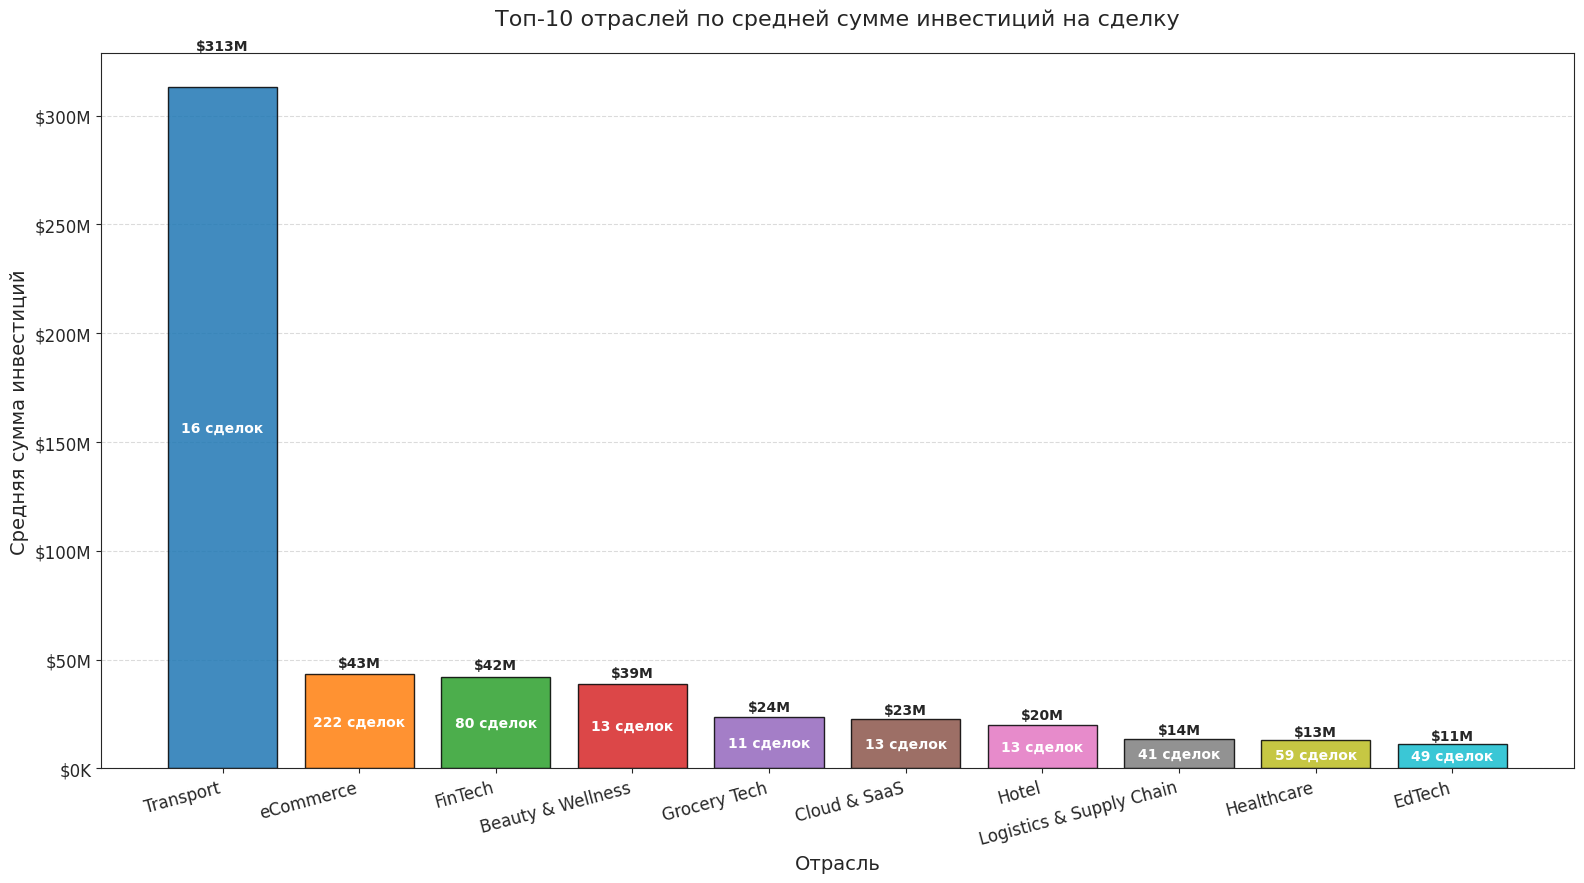

Топ-10 отраслей по средней сумме инвестиций:
-------------------------------------------
                Vertical Average_Amount_  Deal_Count
               Transport           $313M          16
               eCommerce            $43M         222
                 FinTech            $42M          80
       Beauty & Wellness            $39M          13
            Grocery Tech            $24M          11
            Cloud & SaaS            $23M          13
                   Hotel            $20M          13
Logistics & Supply Chain            $14M          41
              Healthcare            $13M          59
                  EdTech            $11M          49


In [40]:
plt.rcParams['figure.figsize'] = (14, 8)

# Запрос данных
industry_avg = df.groupby('Vertical')['Amount'].agg(['mean', 'count']).reset_index()
industry_avg.columns = ['Vertical', 'Average_Amount', 'Deal_Count']
industry_avg = industry_avg[industry_avg['Deal_Count'] >= 10]
top_industries = industry_avg.nlargest(10, 'Average_Amount')

# Визуализация
plt.figure(figsize=(16, 9))
colors = plt.cm.tab10(np.linspace(0, 1, len(top_industries)))
bars = plt.bar(
    top_industries['Vertical'],
    top_industries['Average_Amount'],
    color=colors,
    edgecolor='black',
    alpha=0.85
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.05*height,
        money_formatter(height, None),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.gca().yaxis.set_major_formatter(FuncFormatter(money_formatter))
plt.title('Топ-10 отраслей по средней сумме инвестиций на сделку', fontsize=16, pad=20)
plt.xlabel('Отрасль', fontsize=14)
plt.ylabel('Средняя сумма инвестиций', fontsize=14)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Количество сделок
for i, row in enumerate(top_industries.itertuples()):
    plt.text(
        i,
        row.Average_Amount/2,
        f"{row.Deal_Count} сделок",
        ha='center',
        va='center',
        color='white',
        fontweight='bold',
        fontsize=10
    )

plt.tight_layout()
plt.show()

#Таблицы
print("Топ-10 отраслей по средней сумме инвестиций:")
print("-------------------------------------------")
top_industries['Average_Amount_'] = top_industries['Average_Amount'].apply(money_formatter)
print(top_industries[['Vertical', 'Average_Amount_', 'Deal_Count']].to_string(index=False))

Мы видим, что этот топ идентичен общему распределению инвестиций по отраслям, за исключением того, что трансортная отрасль является абсолютным лидером за счет малого количества сделок. Топ-3 остался тем же (но теперь в другом порядке), а также мы видим такие индустриальные категории как Beauty & Wellness, Grocery Tech, Hotel. Впервые мы видим в топе отрасль связанную с IT - Clous & SaaS - стартапы, предоставляющие решения по облачному хранилищу данных.

Вывод на данном этапе будет включен в итоги проекта

###**Этап 4. Предсказание инвестиций**

**Шаг 1. Создание новых признаков**

На этом этапе мы будем предсказывать будущее рынка инвестиций в индийские стартапы с помощью **ML**-методов. Начнём с того, добавим множество новых признаков, так как из имеющихся у нас только один числовой и один в формате даты - этого крайне мало. Создадим следующие признаки:



1.   Выделим временные признака - год, месяц, день, день недели
2.  Посчитаем количество инвесторов для каждой сделки
3.  Добавим в признаки длину названия стартапа (маркетинговая состовляющая)
4. Добавим частоты появляения субвертикалей для каждой сделки
5.  Прологорифмируем суммы инвестиций, такая величина будет иметь меньшую амплитуду коллебаний, нежели оригинал
6. Офильтруем данные по межквартильному размаху: это улучшит результат будущей модели
7. Упростим категориальные призанаки посредством того, что возьмем оставим только самые популярные 10 из них, остальные проименуем 'Others'
8. Категориальные признаки закодируем через One-Hot: Vertical_simplified, SubVertical, City, Investor, InvestmentType
9. Удалим лишние столбцы
10. Добавим годовые синус и косинус

Результаты запишем в переменную *df_encoded*




In [41]:
# Подготовка данных

df_features = df.dropna().copy()

# 1. Извлечем год и месяц из даты
df_features['Year'] = df_features['Date'].dt.year
df_features['Month'] = df_features['Date'].dt.month
df_features['Day'] = df_features['Date'].dt.day
df_features['DayOfWeek'] = df_features['Date'].dt.dayofweek

# 2. Кол-во инвесторов в сделке (по запятым)
df_features['InvestorCount'] = df_features['Investor'].apply(lambda x: len(str(x).split(',')))

# 3. Длина названия стартапа
df_features['NameLength'] = df_features['Name'].apply(lambda x: len(str(x)))

#4. Частота субвертикали
subvertical_counts = df['SubVertical'].value_counts()
df['SubVerticalFreq'] = df['SubVertical'].map(subvertical_counts)

# 5. Добавим логарифм от суммы инвестиций
df_features['amount_log'] = np.log1p(df_features['Amount'])

# 6. Удалим "выбросы" в Amount по межквартильному размаху
Q1 = df_features['Amount'].quantile(0.25)
Q3 = df_features['Amount'].quantile(0.75)
IQR = Q3 - Q1
df_features = df_features[
  (df_features['Amount'] >= Q1 - 1.5 * IQR) &
  (df_features['Amount'] <= Q3 + 1.5 * IQR)]

# 7. Упростим категориальные переменные (top-10 + "Other")
def simplify(series, top_n=10):
  top = series.value_counts().nlargest(top_n).index
  return series.apply(lambda x: x if x in top else 'Other')
  pass

df_features['Vertical_simplified'] = simplify(df_features['Vertical'], top_n=10)
df_features['SubVertical_simplified'] = simplify(df_features['SubVertical'], top_n=10)
df_features['City_simplified'] = simplify(df_features['City'], top_n=10)
df_features['Investor_simplified'] = simplify(df_features['Investor'], top_n=10)

# 8. One-hot кодирование
categorical_cols = [
    'Vertical_simplified',
    'SubVertical_simplified',
    'City_simplified',
    'Investor_simplified',
    'InvestmentType'
]

df_encoded = pd.get_dummies(df_features, columns=categorical_cols, drop_first=True)

# 9. Удалим лишнее

df_encoded = df_encoded.drop('Vertical', axis=1)
df_encoded = df_encoded.drop('SubVertical', axis=1)
df_encoded = df_encoded.drop('City', axis=1)
df_encoded = df_encoded.drop('Investor', axis=1)
df_encoded = df_encoded.drop('Name', axis=1)
df_encoded = df_encoded.drop('№', axis=1)

# 10. Добавим годовые синус и косинус

df_encoded['YearSin'] = np.sin(2 * np.pi * df_encoded['Year']/2019)
df_encoded['YearCos'] = np.cos(2 * np.pi * df_encoded['Year']/2019)

# Посмотрим размерность финального набора
print("Финальный размер df_encoded:", df_encoded.shape)


Финальный размер df_encoded: (1773, 69)


По итогу мы имеем 70 доступных признаков (правда некоторые из них булевы), что явно улучшит качество предсказаний

**Шаг 2. Корреляция между новыми признаками**

Давайте рассмотрим корреляцию между новыми признаками, ведь чем она выше, тем лучше будут предсказания модели

In [42]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1773 entries, 1 to 3043
Data columns (total 69 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Amount                                            1773 non-null   float64       
 1   Date                                              1773 non-null   datetime64[ns]
 2   Year                                              1773 non-null   int32         
 3   Month                                             1773 non-null   int32         
 4   Day                                               1773 non-null   int32         
 5   DayOfWeek                                         1773 non-null   int32         
 6   InvestorCount                                     1773 non-null   int64         
 7   NameLength                                        1773 non-null   int64         
 8   amount_log                       

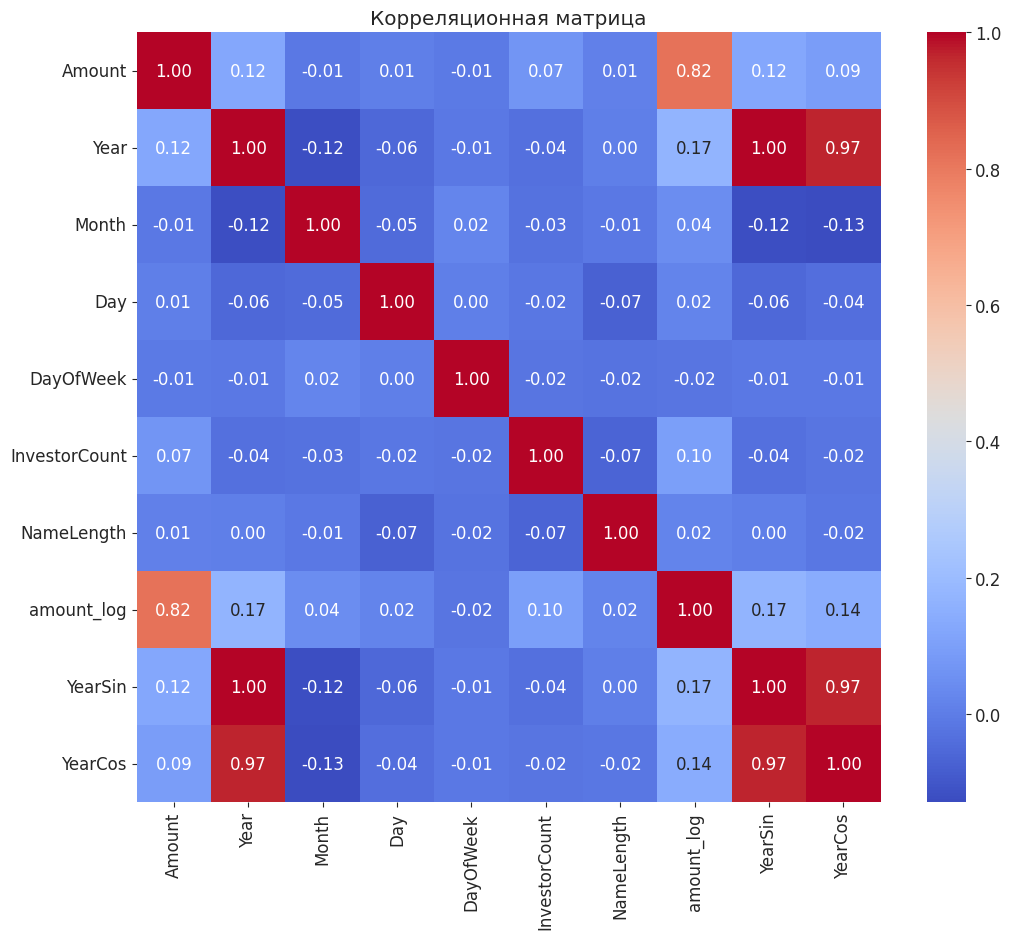

In [43]:
# Отсеим только числовые признаки
corr_matrix = df_encoded.select_dtypes(include=['float64', 'int64', 'int32']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

Мы видим, что данные коррелируют очень слабо, что звучит неутешающе, и скорее всего, нам вряд ли удастся построить хороший прогноз будущих инвестиций. Но мы все равно постараемся =)

**Шаг 3. Обучение: модель kNN**

И так, престпуим к обучению. Сразу возьмём за правило:

*   Каждый раз будем использовать подбор оптимальных гиперпараметров
*   Оценивать модель будем по метрикам $MAE$, $MSE$ и $R^2$
*   В качестве обучающей выборки возьме данные до 14.10.2017, тогда отношение train : test будет как раз 80 : 20





In [44]:
#kNN
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Разделение на train/test по дате
cutoff_date = pd.to_datetime('2017-10-14')
train_mask = df_encoded['Date'] <= cutoff_date
test_mask = df_encoded['Date'] > cutoff_date

# Отделим признаки и целевую переменную
features = df_encoded.drop(columns=['Amount', 'amount_log', 'Date'])
target = df_encoded['amount_log']

X_train = features[train_mask]
y_train = target[train_mask]

X_test = features[test_mask]
y_test = target[test_mask]
y_test_true = df_encoded.loc[test_mask, 'Amount']

# 2. Подбор гиперпараметров
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# 3. Предсказание на тестовой выборке
y_pred_log = best_knn.predict(X_test)
y_pred = np.expm1(y_pred_log)

# 4. Оценка
mae = mean_absolute_error(y_test_true, y_pred)
mse = mean_squared_error(y_test_true, y_pred)
r2 = r2_score(y_test_true, y_pred)

print("\nTest Set Results (2017-10-14):")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² : {r2:.4f}")


Лучшие параметры: {'n_neighbors': 16, 'weights': 'distance'}

Test Set Results (2017-10-14):
MAE: 3592191.99
MSE: 31822035397879.21
R² : -0.4112


Результат получился просто отвратительный : судя по метрике $R^2$, разумнее было бы брать в качестве Amount просто его среднее значение в датасете. Попробуем другие модели...

**Шаг 4. Обучение: модель XGBoost**

Перейдём к древовидным моделям. Возьмём сразу же самую "мощную" : XGBoost. Возможно ранний выбор этой модели ускорит получение адекватного результата. Напомним правила обучения:

*   Каждый раз будем использовать подбор оптимальных гиперпараметров
*   Оценивать модель будем по метрикам $MAE$, $MSE$ и $R^2$
*   В качестве обучающей выборки возьме данные до 14.10.2017, тогда отношение train : test будет как раз 80 : 20

In [45]:
#xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


# 1. Разделение на train/test по дате
cutoff_date = pd.to_datetime('2017-10-14')
train_mask = df_encoded['Date'] <= cutoff_date
test_mask = df_encoded['Date'] > cutoff_date

# 2. Признаки и целевая переменная
features = df_encoded.drop(columns=['Date', 'Amount', 'amount_log'])
target = df_encoded['amount_log']

X_train = features[train_mask]
y_train = target[train_mask]

X_test = features[test_mask]
y_test = target[test_mask]
y_test_true = df_encoded.loc[test_mask, 'Amount']

# 3. Подбор гиперпараметров XGBoost
param_dist = {
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 5, 7, 9],
  'learning_rate': [0.01, 0.05, 0.1, 0.2],
  'subsample': [0.6, 0.8, 1.0],
  'colsample_bytree': [0.6, 0.8, 1.0],
  'gamma': [0, 1, 5],
  'reg_alpha': [0, 0.1, 1],
  'reg_lambda': [1, 1.5, 2]
}

xgb = XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
  xgb,
  param_distributions=param_dist,
  n_iter=30,
  cv=cv,
  scoring='neg_mean_absolute_error',
  n_jobs=-1,
  verbose=1,
  random_state=42
)

random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_
print("🔍 Лучшие параметры:", random_search.best_params_)

# 4. Предсказание и метрики
y_pred_log = best_xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test_true, y_pred)
mse = mean_squared_error(y_test_true, y_pred)
r2 = r2_score(y_test_true, y_pred)

print(f"\n📅 Test Set Results (2019.07–2020.01):")
print(f"MAE: {mae:,.2f}")
print(f"MSE: {mse:,.2f}")
print(f"R² : {r2:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔍 Лучшие параметры: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.6}

📅 Test Set Results (2019.07–2020.01):
MAE: 3,122,022.36
MSE: 24,535,729,972,211.71
R² : -0.0881


Результат слегка улучшился, но это все равно неумолимо далеко от идеала. Поэтому прибегнем к более усовершенствованному выбору модели : протестируем их все сразу

**Шаг 5. Обучение: Битва моделей**

Предлагается попробовать обучиться на нескольких моделях сразу, и вяснить какая из них больше подходит для нашего датасета. Возьмём Случайный лес (Random Forest), Gradient Boosting, XGBoost, ElasticNet, Lasso. Также доработаем правила:
*   Каждый раз будем использовать подбор оптимальных гиперпараметров
*   Оценивать модель будем по метрикам $MAE$, $MSE$ и $R^2$
*   Будем использовать кросс-валидацию для улучшения качества обучения

На этом шаге я использовал нейросеть Claude 3.7 Sonnet, так как не разбираюсь во всех моделях ML.

Запускаем процесс:

In [46]:
test_data = df_encoded[df_encoded['Date'] >= pd.Timestamp('2017-10-14')]
train_data = df_encoded[df_encoded['Date'] < pd.Timestamp('2017-10-14')]
print(f'{len(train_data) / len(test_data)}')

4.022662889518414


In [47]:
#битва моделей
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Ridge, Lasso
import xgboost as xgb
import time

# Подготовка данных
features_to_exclude = ['Date', 'Amount', 'amount_log']
X = df_encoded.drop(features_to_exclude, axis=1)
y = df_encoded['Amount']  # Используем Amount без логарифмирования

print(f"Размер данных: {X.shape}")

# Исправленная часть функции evaluate_model_cv
def evaluate_model_cv(model_name, model, param_grid, X, y, cv=5):
    start_time = time.time()

    # Создаем пайплайн со стандартизацией
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Настраиваем объект GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )

    # Обучаем модель с подбором гиперпараметров
    grid_search.fit(X, y)

    # Получаем лучший индекс и параметры
    best_index = grid_search.best_index_

    # Получаем результаты для лучшей модели
    cv_scores = grid_search.cv_results_['mean_test_score'][best_index]
    cv_mse = -cv_scores  # Конвертируем обратно в MSE (т.к. у нас neg_mean_squared_error)
    cv_rmse = np.sqrt(cv_mse)

    # Обучаем модель на всех данных с лучшими параметрами
    best_model = grid_search.best_estimator_

    # Предсказываем значения для всего набора данных
    y_pred = best_model.predict(X)

    # Вычисляем метрики на всем наборе данных
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    elapsed_time = time.time() - start_time

    # Выводим результаты
    print(f"\n{model_name} - Результаты:")
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Средний MSE по CV: {cv_mse:.2f}")
    print(f"Средний RMSE по CV: {cv_rmse:.2f}")
    print(f"MAE (на всех данных): {mae:.2f}")
    print(f"MSE (на всех данных): {mse:.2f}")
    print(f"RMSE (на всех данных): {rmse:.2f}")
    print(f"R² (на всех данных): {r2:.4f}")
    print(f"Время выполнения: {elapsed_time:.2f} секунд")

    return {
        'model_name': model_name,
        'best_model': best_model,
        'best_params': grid_search.best_params_,
        'cv_mse': cv_mse,
        'cv_rmse': cv_rmse,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'time': elapsed_time
    }

# Определяем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Словарь для хранения результатов
results = {}

# 1. Random Forest
rf_params = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}
results['RandomForest'] = evaluate_model_cv('Random Forest', RandomForestRegressor(random_state=42), rf_params, X, y, kf)

# 2. Gradient Boosting
gb_params = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}
results['GradientBoosting'] = evaluate_model_cv('Gradient Boosting', GradientBoostingRegressor(random_state=42), gb_params, X, y, kf)

# 3. XGBoost
xgb_params = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}
results['XGBoost'] = evaluate_model_cv('XGBoost', xgb.XGBRegressor(random_state=42), xgb_params, X, y, kf)

# 4. ElasticNet
en_params = {
    'model__alpha': [0.001, 0.01, 0.1, 1.0],
    'model__l1_ratio': [0.1, 0.5, 0.7, 0.9]
}
results['ElasticNet'] = evaluate_model_cv('ElasticNet', ElasticNet(random_state=42, max_iter=10000), en_params, X, y, kf)

# 5. Ridge
ridge_params = {
    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}
results['Ridge'] = evaluate_model_cv('Ridge', Ridge(random_state=42), ridge_params, X, y, kf)

# 6. Lasso
lasso_params = {
    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}
results['Lasso'] = evaluate_model_cv('Lasso', Lasso(random_state=42, max_iter=10000), lasso_params, X, y, kf)

# Сравнение результатов
print("\n" + "="*50)
print("Сравнение моделей по R²:")
for model_name, result in sorted(results.items(), key=lambda x: x[1]['r2'], reverse=True):
    print(f"{model_name}: {result['r2']:.4f}")

# Определение лучшей модели
best_model_name = max(results.items(), key=lambda x: x[1]['r2'])[0]
best_result = results[best_model_name]

print("\n" + "="*50)
print(f"Лучшая модель: {best_model_name}")
print(f"R²: {best_result['r2']:.4f}")
print(f"RMSE: {best_result['rmse']:.2f}")
print(f"MAE: {best_result['mae']:.2f}")
print(f"Лучшие параметры: {best_result['best_params']}")

Размер данных: (1773, 66)
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Random Forest - Результаты:
Лучшие параметры: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Средний MSE по CV: 11719132427758.49
Средний RMSE по CV: 3423321.84
MAE (на всех данных): 1762175.80
MSE (на всех данных): 7603984309235.62
RMSE (на всех данных): 2757532.29
R² (на всех данных): 0.5752
Время выполнения: 160.36 секунд
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Gradient Boosting - Результаты:
Лучшие параметры: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 50}
Средний MSE по CV: 11628125277953.91
Средний RMSE по CV: 3410003.71
MAE (на всех данных): 1744370.13
MSE (на всех данных): 7610572521676.00
RMSE (на всех данных): 2758726.61
R² (на всех данных): 0.5749
Время выполнения: 87.65 секунд
Fitting 5 folds for each of 27 candidates, totalling 135 fits

XGBoost - Результаты:
Лучшие параметры: {'model__learning

По результатам данного состязания победил случайные лес, хотя и его результат не является весьма впечатляющим (лучший из худших...)
 Поэтому предлагается подобрать для него еще более оптимальные гиперпараметры и завершить на этом данный этап

**Шаг 6. Доработанный подбор гиперпараметров для Random Forest**

Увеличим пространоство возможных гиперпараметров и подберём лучшие. Ограничемся 200-ми вызовами функции *random_search.fit*, так как код работает и так неприлично долго:



Размер данных: (1773, 66)
Проводим поиск оптимальных параметров...
Fitting 5 folds for each of 40 candidates, totalling 200 fits

Random Forest - Результаты:
Лучшие параметры: {'model__n_estimators': 250, 'model__min_samples_split': 8, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 10, 'model__bootstrap': True}
Средний MSE по CV: 12465493196271.76
Средний RMSE по CV: 3530650.53
MAE (на всех данных): 1943724.14
MSE (на всех данных): 8985985979852.50
RMSE (на всех данных): 2997663.42
R² (на всех данных): 0.4981
Время выполнения: 51.96 секунд

Проводим уточняющий поиск вокруг лучших параметров...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Random Forest - Результаты:
Лучшие параметры: {'model__n_estimators': 200, 'model__min_samples_split': 8, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 10, 'model__bootstrap': True}
Средний MSE по CV: 12495205365211.82
Средний RMSE по CV: 3534855.78
MAE (на всех данн

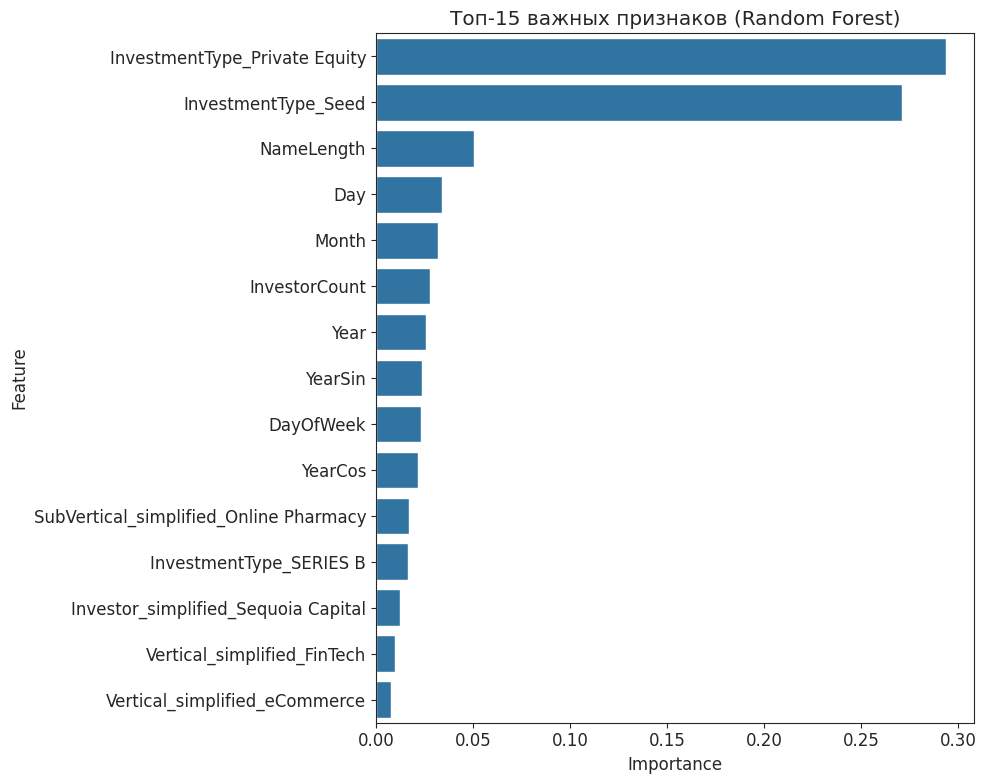


Сравнение с первоначальным результатом:
Первоначальный R²: 0.5623
Первый поиск R²: 0.4981
Уточненный поиск R²: 0.4969
Улучшение: -6.54%


In [48]:
#СЛУЧАЙНЫЙ ЛЕС - подбор гиперпараметров

# Подготовка данных
features_to_exclude = ['Date', 'Amount', 'amount_log']
X = df_encoded.drop(features_to_exclude, axis=1)
y = df_encoded['Amount']

print(f"Размер данных: {X.shape}")

# Функция для оценки модели с RandomizedSearchCV вместо GridSearchCV
def evaluate_rf_model(param_distributions, X, y, n_iter=30, cv=5):
    start_time = time.time()

    # Создаем пайплайн со стандартизацией
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ])

    # Настраиваем объект RandomizedSearchCV вместо GridSearchCV
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=n_iter,  # Проверяем только n_iter случайных комбинаций
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    # Обучаем модель с подбором гиперпараметров
    random_search.fit(X, y)

    # Получаем лучший индекс и параметры
    best_index = random_search.best_index_

    # Получаем результаты для лучшей модели
    cv_scores = random_search.cv_results_['mean_test_score'][best_index]
    cv_mse = -cv_scores  # Конвертируем обратно в MSE
    cv_rmse = np.sqrt(cv_mse)

    # Обучаем модель на всех данных с лучшими параметрами
    best_model = random_search.best_estimator_

    # Предсказываем значения для всего набора данных
    y_pred = best_model.predict(X)

    # Вычисляем метрики на всем наборе данных
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    elapsed_time = time.time() - start_time

    # Выводим результаты
    print("\nRandom Forest - Результаты:")
    print(f"Лучшие параметры: {random_search.best_params_}")
    print(f"Средний MSE по CV: {cv_mse:.2f}")
    print(f"Средний RMSE по CV: {cv_rmse:.2f}")
    print(f"MAE (на всех данных): {mae:.2f}")
    print(f"MSE (на всех данных): {mse:.2f}")
    print(f"RMSE (на всех данных): {rmse:.2f}")
    print(f"R² (на всех данных): {r2:.4f}")
    print(f"Время выполнения: {elapsed_time:.2f} секунд")

    return {
        'best_model': best_model,
        'best_params': random_search.best_params_,
        'cv_results': random_search.cv_results_,
        'cv_mse': cv_mse,
        'cv_rmse': cv_rmse,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'time': elapsed_time
    }

# Определяем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Параметры для RandomForest, ориентируясь на ранее найденный оптимум
# {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
rf_params = {
    'model__n_estimators': [100, 150, 200, 250, 300],
    'model__max_depth': [8, 10, 12, 15, 20],
    'model__min_samples_split': [5, 8, 10, 12, 15],
    'model__min_samples_leaf': [1, 2, 4, 5],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__bootstrap': [True, False]
}

# Проводим поиск с меньшим количеством итераций
print("Проводим поиск оптимальных параметров...")
results = evaluate_rf_model(rf_params, X, y, n_iter=40)

# Дополнительный целенаправленный поиск вокруг лучших найденных параметров
best_params = results['best_params']
print("\nПроводим уточняющий поиск вокруг лучших параметров...")

# Создаем более узкий диапазон параметров вокруг лучших
refined_params = {}

# Для n_estimators
best_n_estimators = int(best_params.get('model__n_estimators', 200))
refined_params['model__n_estimators'] = [
    max(50, best_n_estimators - 50),
    best_n_estimators,
    best_n_estimators + 50
]

# Для max_depth
best_max_depth = best_params.get('model__max_depth')
if best_max_depth is None:
    refined_params['model__max_depth'] = [None, 20, 30]
else:
    refined_params['model__max_depth'] = [
        max(3, best_max_depth - 2),
        best_max_depth,
        best_max_depth + 2
    ]

# Для min_samples_split
best_min_samples_split = int(best_params.get('model__min_samples_split', 10))
refined_params['model__min_samples_split'] = [
    max(2, best_min_samples_split - 2),
    best_min_samples_split,
    best_min_samples_split + 2
]

# Для min_samples_leaf
best_min_samples_leaf = int(best_params.get('model__min_samples_leaf', 1))
refined_params['model__min_samples_leaf'] = [
    max(1, best_min_samples_leaf - 1),
    best_min_samples_leaf,
    best_min_samples_leaf + 1
]

# Для max_features - используем найденное лучшее значение и еще 1-2 опции
best_max_features = best_params.get('model__max_features', 'auto')
if best_max_features == 'auto':
    refined_params['model__max_features'] = ['auto', 'sqrt']
elif best_max_features == 'sqrt':
    refined_params['model__max_features'] = ['sqrt', 'log2']
else:
    refined_params['model__max_features'] = [best_max_features, 'auto']

# Для bootstrap - используем найденное лучшее значение
best_bootstrap = best_params.get('model__bootstrap', True)
refined_params['model__bootstrap'] = [best_bootstrap]

# Проводим уточняющий поиск
refined_results = evaluate_rf_model(refined_params, X, y, n_iter=20)

# Анализ важности признаков для лучшей модели
best_model = refined_results['best_model']

# Извлекаем важность признаков
if hasattr(best_model.named_steps['model'], 'feature_importances_'):
    importances = best_model.named_steps['model'].feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("\nТоп-15 важных признаков:")
    print(feature_importance_df.head(15))

    # Визуализация важности признаков (топ-15)
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
    plt.title('Топ-15 важных признаков (Random Forest)')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

# Сравнение с первоначальными результатами (R² = 0.5623)
original_r2 = 0.5623
print("\nСравнение с первоначальным результатом:")
print(f"Первоначальный R²: {original_r2:.4f}")
print(f"Первый поиск R²: {results['r2']:.4f}")
print(f"Уточненный поиск R²: {refined_results['r2']:.4f}")
print(f"Улучшение: {(refined_results['r2'] - original_r2) * 100:.2f}%")

Мы получили сводку, что наилучшие гиперпараметры такие:

*        n_estimators=200,
*       max_depth=10,
*      min_samples_split=8,
*        random_state=42,
*       min_samples_leaf=1,
*       max_features='sqrt',
*       bootstrap=True

*Замечание. При разных запусках блокнота были разные результаты, так как другие ячейки кода выше последней редактировались после её написания, но данный набор параметров всё равно оказался наилучшим.*

**Шаг 7. Визуализация результатов**

Оформим график с результатми предсказаний нашей модели

Метрики на обучающей выборке:
MAE: 1962411.24
RMSE: 2996068.12
R²: 0.5086

Метрики на тестовой выборке:
MAE: 2148947.44
RMSE: 3264657.37
R²: 0.3506


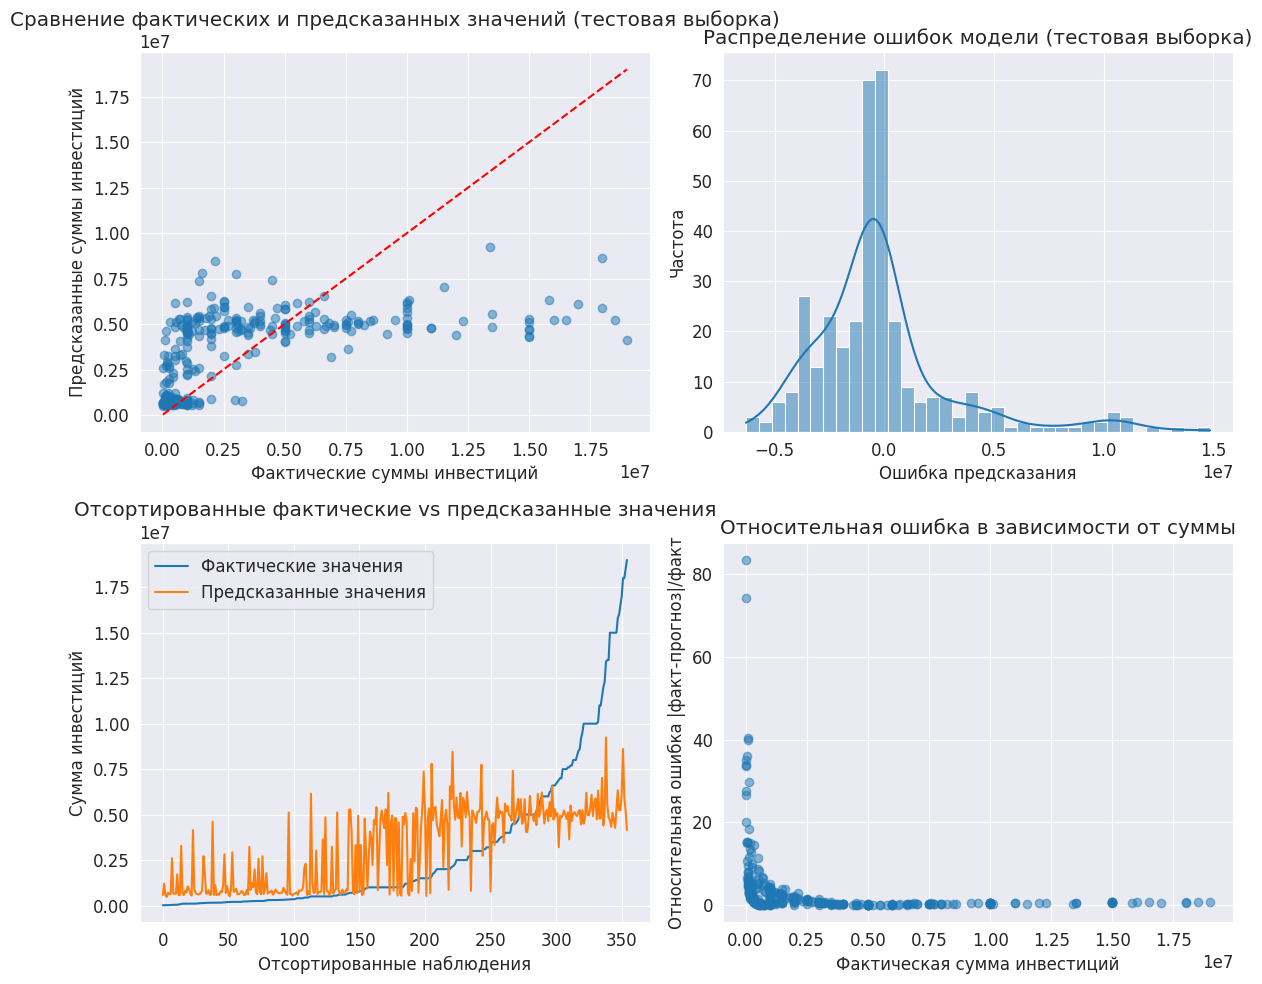

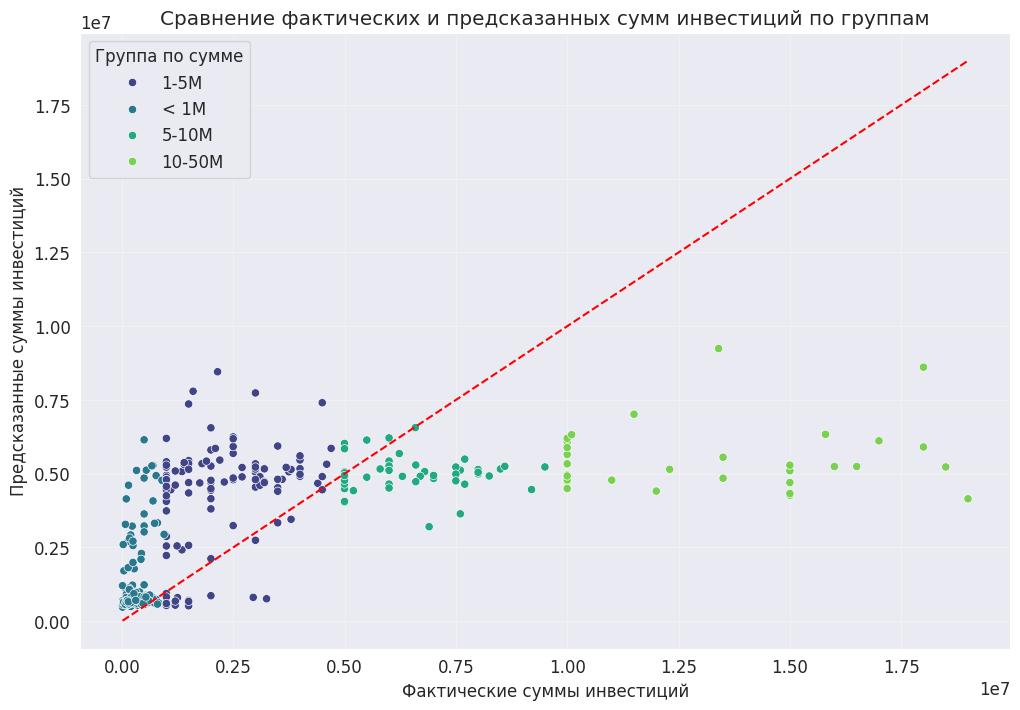

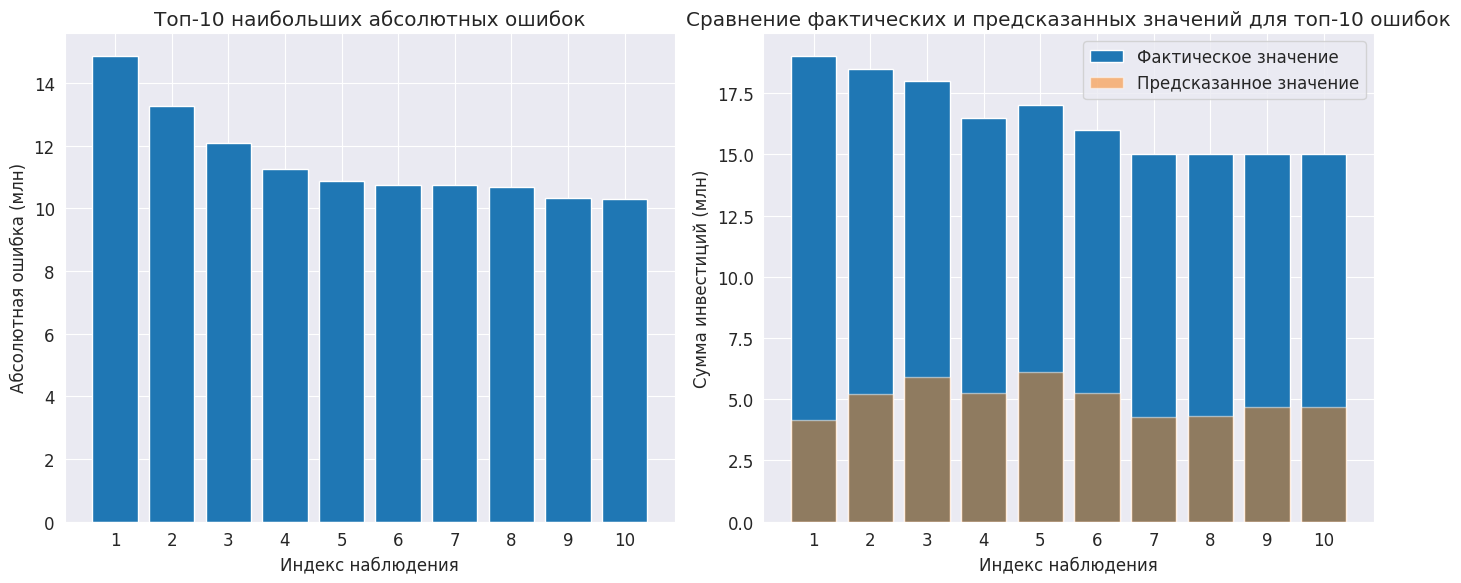

In [56]:
#СЛУЧАЙНЫЙ ЛЕС
from sklearn.model_selection import train_test_split

# Предполагаем, что best_model - это уже обученная модель RandomForest
# Если у вас нет готовой модели, создадим ее с параметрами, которые были определены как лучшие

# Подготовка данных
features_to_exclude = ['Date', 'Amount', 'amount_log']
X = df_encoded.drop(features_to_exclude, axis=1)
y = df_encoded['Amount']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель с найденными оптимальными параметрами
# Используем параметры, которые были найдены ранее

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=8,
        random_state=42,
        min_samples_leaf=1,
        max_features='sqrt',
        bootstrap=True
    ))
])

pipeline.fit(X_train, y_train)

# Делаем предсказания
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Оцениваем качество модели
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("Метрики на обучающей выборке:")
print(f"MAE: {mae_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.4f}")

print("\nМетрики на тестовой выборке:")
print(f"MAE: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.4f}")

# График сравнения фактических и предсказанных значений
plt.figure(figsize=(12, 10))

# 1. Сравнение на тестовой выборке (scatterplot)
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические суммы инвестиций')
plt.ylabel('Предсказанные суммы инвестиций')
plt.title('Сравнение фактических и предсказанных значений (тестовая выборка)')

# 2. Гистограмма ошибок на тестовой выборке
plt.subplot(2, 2, 2)
errors = y_test - y_pred_test
sns.histplot(errors, kde=True)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок модели (тестовая выборка)')

# 3. Сравнение отсортированных значений
plt.subplot(2, 2, 3)
sorted_indices_test = np.argsort(y_test)
plt.plot(y_test.iloc[sorted_indices_test].values, label='Фактические значения')
plt.plot(y_pred_test[sorted_indices_test], label='Предсказанные значения')
plt.xlabel('Отсортированные наблюдения')
plt.ylabel('Сумма инвестиций')
plt.title('Отсортированные фактические vs предсказанные значения')
plt.legend()

# 4. Относительная ошибка в зависимости от фактического значения
plt.subplot(2, 2, 4)
relative_errors = abs(errors) / y_test
plt.scatter(y_test, relative_errors, alpha=0.5)
plt.xlabel('Фактическая сумма инвестиций')
plt.ylabel('Относительная ошибка |факт-прогноз|/факт')
plt.title('Относительная ошибка в зависимости от суммы')

plt.tight_layout()

plt.show()

# Дополнительный график: предсказанные vs фактические значения с разбивкой по диапазонам
# Создадим группы по размеру инвестиций
def create_amount_group(amount):
    if amount < 1_000_000:
        return '< 1M'
    elif amount < 5_000_000:
        return '1-5M'
    elif amount < 10_000_000:
        return '5-10M'
    elif amount < 50_000_000:
        return '10-50M'
    else:
        return '> 50M'

# Применяем функцию к тестовым данным
test_data = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred_test
})
test_data['amount_group'] = test_data['actual'].apply(create_amount_group)

# Строим график с разбивкой по группам
plt.figure(figsize=(12, 8))
sns.scatterplot(x='actual', y='predicted', hue='amount_group', data=test_data, palette='viridis')
plt.plot([test_data['actual'].min(), test_data['actual'].max()],
         [test_data['actual'].min(), test_data['actual'].max()], 'r--')
plt.xlabel('Фактические суммы инвестиций')
plt.ylabel('Предсказанные суммы инвестиций')
plt.title('Сравнение фактических и предсказанных сумм инвестиций по группам')
plt.grid(True, alpha=0.3)
plt.legend(title='Группа по сумме')
plt.show()

# Добавим график, показывающий топ-10 самых больших ошибок
test_data['absolute_error'] = abs(test_data['actual'] - test_data['predicted'])
test_data['relative_error'] = test_data['absolute_error'] / test_data['actual']

# Сортируем по абсолютной ошибке
top_errors = test_data.sort_values('absolute_error', ascending=False).head(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(top_errors)), top_errors['absolute_error'] / 1_000_000)
plt.xticks(range(len(top_errors)), [f"{i+1}" for i in range(len(top_errors))], rotation=0)
plt.xlabel('Индекс наблюдения')
plt.ylabel('Абсолютная ошибка (млн)')
plt.title('Топ-10 наибольших абсолютных ошибок')

plt.subplot(1, 2, 2)
plt.bar(range(len(top_errors)), top_errors['actual'] / 1_000_000, label='Фактическое значение')
plt.bar(range(len(top_errors)), top_errors['predicted'] / 1_000_000, alpha=0.5, label='Предсказанное значение')
plt.xticks(range(len(top_errors)), [f"{i+1}" for i in range(len(top_errors))], rotation=0)
plt.xlabel('Индекс наблюдения')
plt.ylabel('Сумма инвестиций (млн)')
plt.title('Сравнение фактических и предсказанных значений для топ-10 ошибок')
plt.legend()

plt.tight_layout()
plt.savefig('random_forest_top_errors.png', dpi=300)
plt.show()

**Шаг 8. Вывод**

Подведём этоги данного этапа : взглянем еще раз на описание столбца Amount:

In [50]:
df['Amount'].describe()

,Amount
count,2.056000e+03
mean,1.849454e+07
std,1.216346e+08
min,1.600000e+04
25%,4.690000e+05
50%,1.700000e+06
75%,8.000000e+06
max,3.900000e+09


По графику результатов работы модели мы видим полный крах в попытке обощить данные на будущее. Крайне высокая дисперсия предсказаний испортила картину, но остается открытым вопрос : *можно ли предсказать лучше?*

Теперь проинтерпретируем результат предсказания модели :

*   **R² (коэффициент детерминации)**

На обучающей выборке модель объясняет около 64.5% вариации целевой переменной, а тестовой выборке этот показатель значительно падает до 35.7%. Это говорит о существенном переобучении модели, несмотря на использование кросс-валидации и оптимизацию гиперпараметров
*   **MAE (средняя абсолютная ошибка)**

Средняя ошибка предсказания составляет около 2.12 млн на тестовой выборке. Учитывая, что медианное значение инвестиций составляет 1.7 млн, а среднее - 18.5 млн, эта ошибка является значительной для малых инвестиций, но допустимой для крупных

* **RMSE (среднеквадратическая ошибка)**

RMSE около 3.25 млн на тестовой выборке. Более высокое значение RMSE по сравнению с MAE указывает на наличие выбросов и больших ошибок в некоторых предсказаниях

Всё это указывает крайнюю на сложность обобщения модели на новые данные. Выделим основные проблемы исходного датасета :



1.  <u>Высокая неоднородность данных:</u> высокий уровень ассиметри
данных делает задачу предсказания рынка тяжелой для любой модели
2.   <u>Слабая корреляция между признаками:</u> при такой низкой корреляции признаков сложно получить ± хорошие предсказания, так как зависимость данных очень слабая вследствии следющего пункта
3.   <u>Нелинейные и сложные зависимости в реальной жизни:</u> решения об инвестициях часто основаны на сложных, взаимосвязанных факторах, который не были отражены в этом датасете, поэтому даже Random Forest не смог построить хороший прогноз

Теперь ответим на вопрос: *можно ли предсказать лучше?* Думаю, что нет, так как количество признаков в исходном датасете крайне ограниченное, а игра с моделями не приведет к значительному продвижению в плане качества.



###**Этап 5. Заключение**

Настало время подвести итоги пет-проекта!

Подведём итоги по каждому этапу отдельно (кроме этапа прогнозирования инвестиций, его вывод этого был сформулирован в его блоке):



1.   <u>Загрузка и подготовка датасета к использованию</u>

На этом этапе загрузил и подготовил датасет к использованию: удалил пропуски и ненужные столбцы, исправил текстовые ошибки, стандартизировал текстовые признаки, настроил формат данных. Получившийся вариант значительно отличается от исходного.

2.   <u>EDA</u>

На этом этапе были выявлены основные закономерности рынка инвестиций :
   * Суммы инвестиционных сделок не имеют четкого распредления. Также для них характерна ассиметрия : максимальное и минимальное значения отличются в более 100.000 раз, среднее больше медианы, а дисперсия больше среднего
   * Объём инвестиций слабо коррелирует со временем (объём рынка сделок то возрастал, то убывал), но количество сделок монотонно убывало с каждым годом
   * Были выявлены самые популярные индустриальные отрасли для инвестирования - это eCommerce, FinTech, платформы online услуг, в основном B2C
   *  Наблюдалась концентрация инвестиций в отдельных городах : Bangalore, Mumbai, Gurugram и Delhi (столица)
   * Самыми крупными инвесторами оказались Westbrige Capital, SoftBank Group, "Microsoft и партнёры", а также частный индийский инвестор Vijay Shekhar Sharma
   * Больше всего инвестиций производилось в виде инвестицияй в частные непубличные компании, на втором месте - инвестиции средних раундов, а на третьем - высокорисковые инвестиции в новые стартапы

3.   <u>Детальный анализ</u>

На этом этапе был окончательно сформулирован главный тезис по результатам аналитики проекта :


Больше всего инвестиций привлекли стартапы

  * Flipkart (https://ru.wikipedia.org/wiki/Flipkart) - индийский онлайн маркетплейс (eComerce), у которого 5 инвесторов, крупнейшие из которых "Softbank Group" и "Microsoft, eBay, Tencent Holdings" с объёмом инвестиций в 4 млрд долларов.
  Этот стартап сейчас оценивается в более чем 20 млрд долларов.
  * Rapido Bike Taxi (https://en.wikipedia.org/wiki/Rapido_(company)?ysclid=mdf8pn2367400503354), имеющий единственным инвестором WestbrigeCapital, который вложил 3.9 млрд долларов. Этот сервис является аггрегатором таксопарков механических транспортных средстав.
  * Paytm (https://en.wikipedia.org/wiki/Paytm?ysclid=mdf98831m5963588064) - его самым крупным инвестором ялвяется опять же Softbank, а также Vijay Shekhar Sharma. Это финтех компания, которая предоставляет главным образом веб-кошельки, а также возможность оплаты услуг по QR-коду.
  * Ola Cabs (https://en.m.wikipedia.org/wiki/Ola_Consumer) - сервис аггрегации такси. И опять же одинм из его самых крупных инвесторов Softbank.

  * Udaan - B2B Маркетплейс, попадающий в категорию eCommerce

  * Swiggy (https://en.wikipedia.org/wiki/Swiggy?ysclid=mdf9o68wr13723355) - этот стартап не собрал рекордное количество денег, однако стал первым в топе по количеству инвестиционных сделок. Это так называемый eTail - онлайн-магазин всего подряд для конечных покупателей





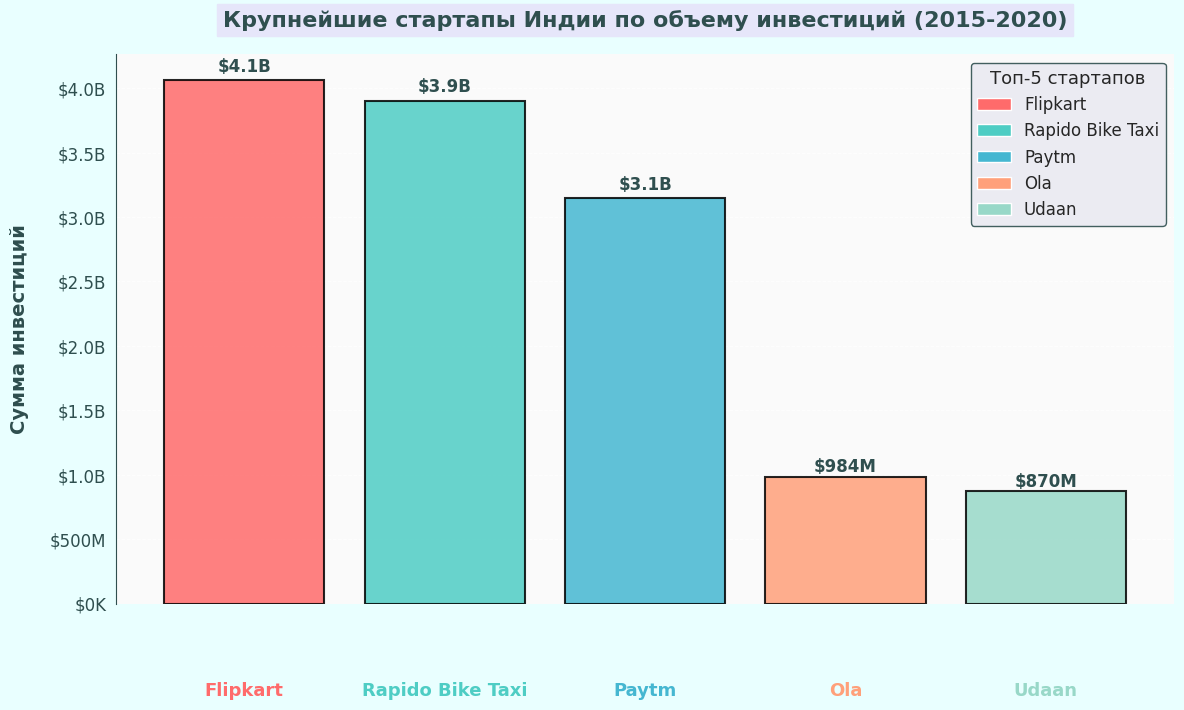

In [51]:
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import matplotlib.ticker as ticker

startup_totals = df.groupby('Name')['Amount'].sum().reset_index()
top_startups = startup_totals.sort_values('Amount', ascending=False).head(5)

sns.set_style('darkgrid')
mpl.rcParams['font.family'] = 'DejaVu Sans'
fig, ax = plt.subplots(figsize=(12, 8), facecolor='#000000')
fig.patch.set_alpha(0.7)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

bars = ax.bar(top_startups['Name'], top_startups['Amount'],
             color=colors, edgecolor='black', linewidth=1.5,
             alpha=0.85, zorder=3)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height*1.01,
            money_formatter(height),
            ha='center', va='bottom', fontsize=12, fontweight='bold',
            color='#2f4f4f', rotation=0)


ax.set_ylabel('Сумма инвестиций', fontsize=14, labelpad=15, fontweight='bold', color='#2f4f4f')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(money_formatter))
ax.tick_params(axis='y', colors='#2f4f4f', labelsize=12)
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_xticks([])
ax.set_xlabel('')

for i, (name, amount) in enumerate(zip(top_startups['Name'], top_startups['Amount'])):
    ax.text(i, -max(top_startups['Amount'])*0.15, name,
            ha='center', va='top', fontsize=13, rotation=0,
            fontweight='bold', color=colors[i])

legend_patches = [plt.Rectangle((0,0),1,1, fc=color) for color in colors]
ax.legend(legend_patches, top_startups['Name'],
          loc='upper right', fontsize=12, title='Топ-5 стартапов',
          title_fontsize=13, framealpha=0.9, edgecolor='#2f4f4f')

title = ax.set_title('Крупнейшие стартапы Индии по объему инвестиций (2015-2020)',
                    fontsize=16, pad=20, fontweight='bold',
                    color='#2f4f4f')
title.set_backgroundcolor('#e6e6fa')
title.set_position([0.5, 1.05])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_color('#2f4f4f')

ax.xaxis.grid(False)

ax.set_facecolor('#fafafa')
fig.patch.set_facecolor('#e0ffff')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Также, стоит вспомнить, что самыми ппулярными отраслями для инвестирования оказались eCommerce, Consumer Internet, Transport, FinTech, Technology и т. д.

**<u>На основе этого сделаем главный вывод по аналитике датасета :</u>**

**Больше всего инвестиций привлекают стартапы B2C, продукты которых нацелены на массовую аудиторию, чем больше клиентов - тем лучше, а также важным фактором является их цифровизация : клиенты получают услуги через телефоны, компьютеры и т. д. Эти стартапы ориентированы на массовое потребление и легкость в пользовании их продуктов, а также заточены под Индийскиую аудиторию и используют доступные для обычного населения технологии. Электронная коммерция стала главной отраслью для инвестирования в 10-ых годах 21 века в Индии**

**Основные инвесторы - иностранные фирмы и инвестиционные фонды, что говорит об Индии, как о привлекательной территории для капиталавложения, как о стране, где колоссально огромная потенциальная аудитория потребления и рабочая сила, но где еще не успели (на момент 2015-2020) сформироваться сверхгиганты местного рынка современных услуг.**


